In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/캐글/santander/santander-product-recommendation/train_ver2.csv/train_ver2.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(13647309, 48)

In [4]:
data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [6]:
columns = [col for col in data.columns[:24] if data[col].dtype in ['int64','float64']]
print(len(columns))
data[columns].describe()

7


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [7]:
columns = [col for col in data.columns[:24] if data[col].dtype in ['object']]
print(len(columns))
data[columns].describe()

17


,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


--------------------------------------------------
col :  fecha_dato


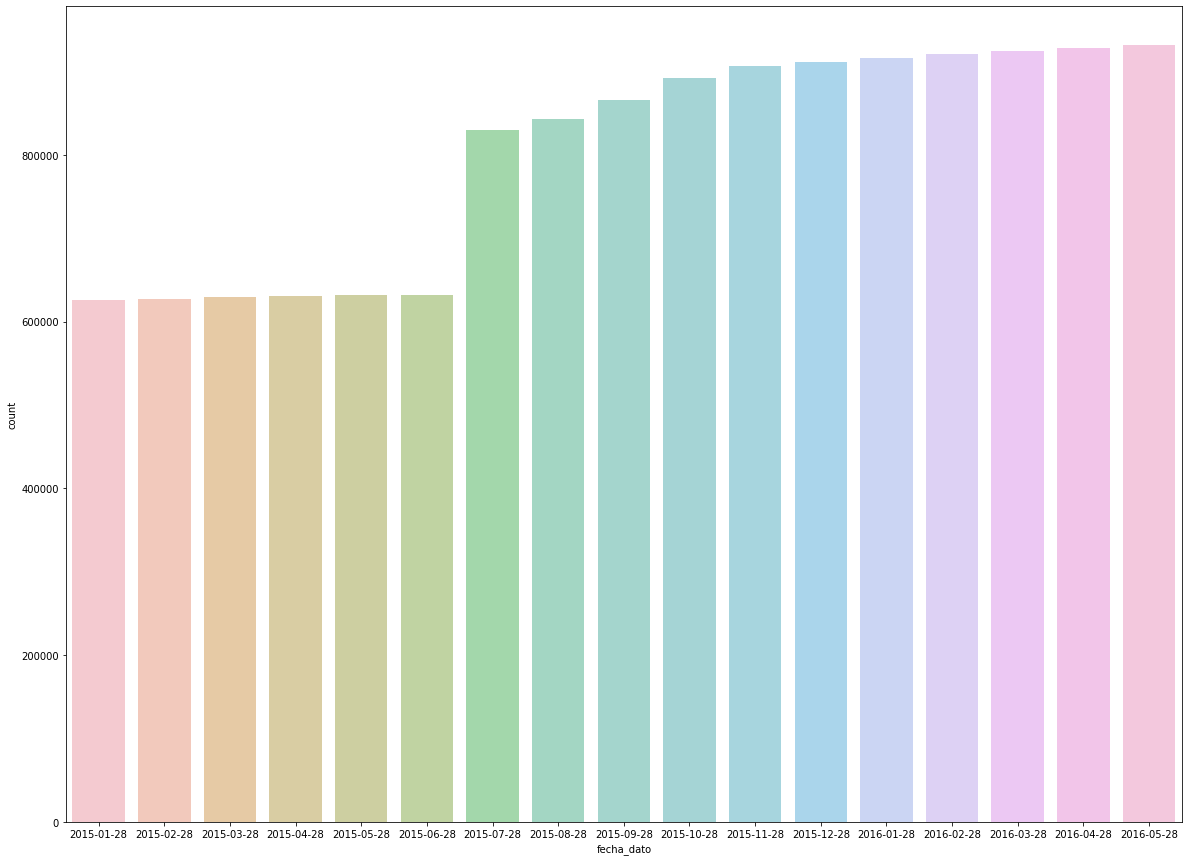

--------------------------------------------------
col :  ind_empleado


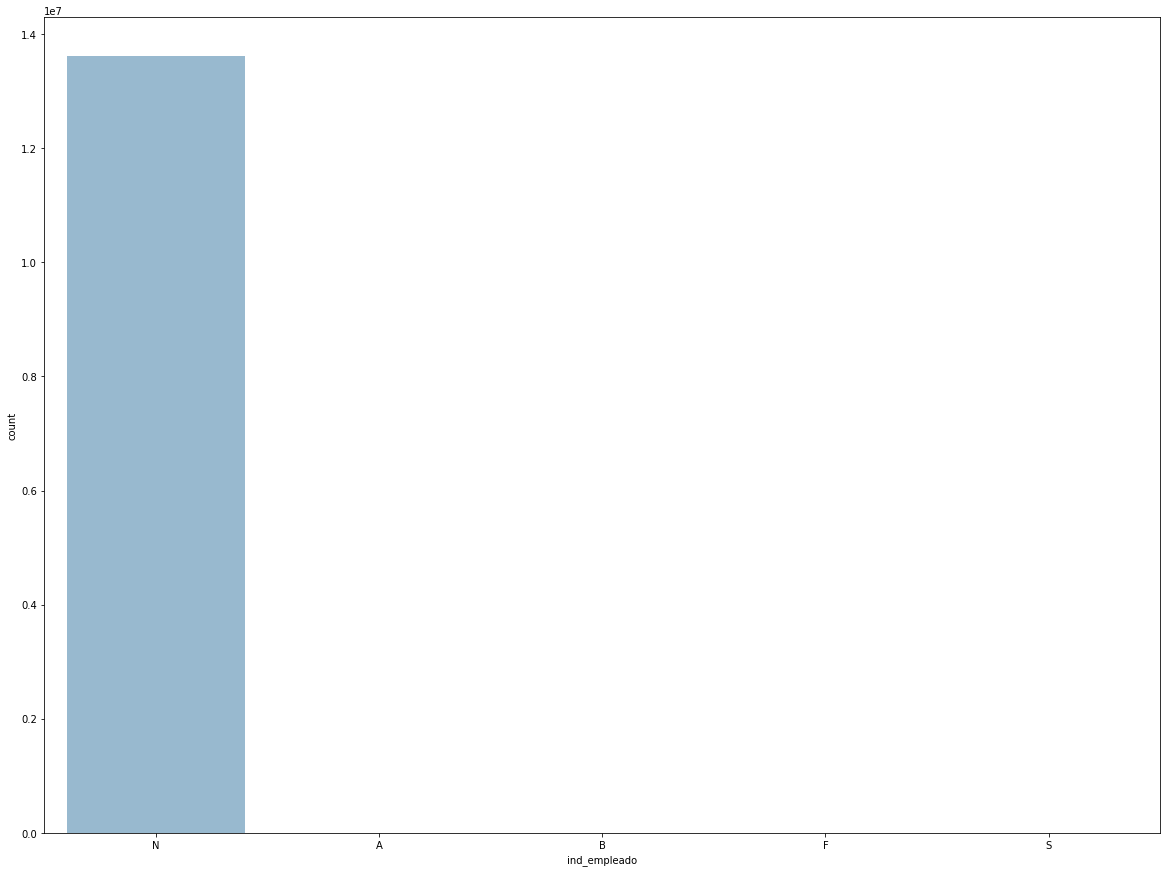

--------------------------------------------------
col :  pais_residencia


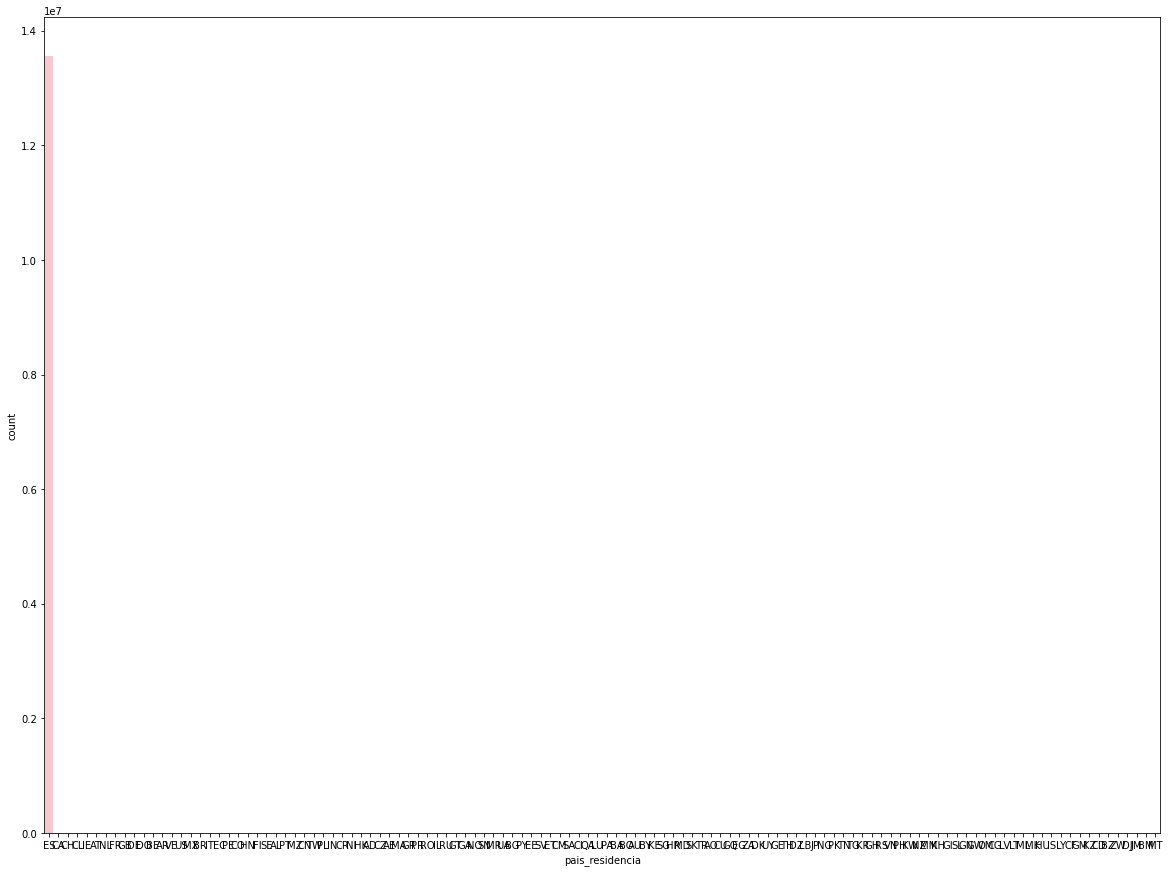

--------------------------------------------------
col :  sexo


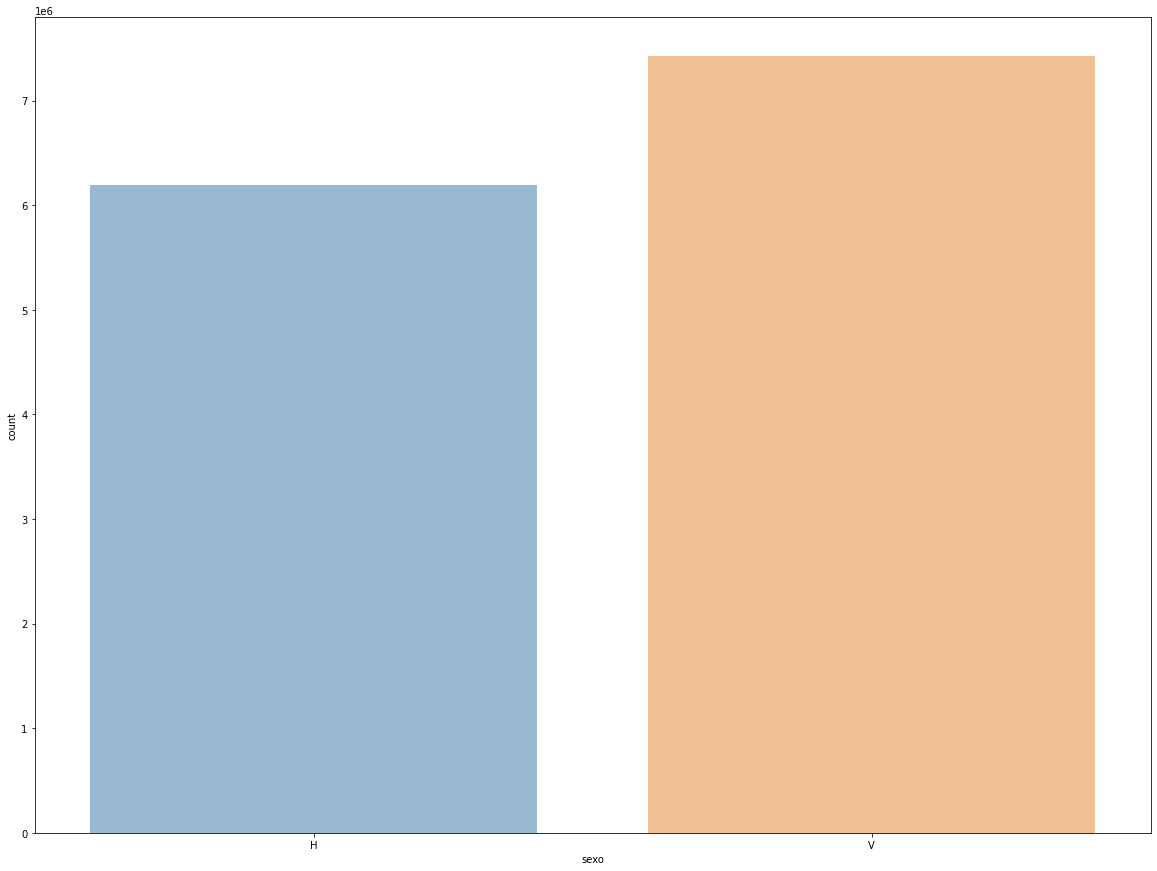

--------------------------------------------------
col :  age


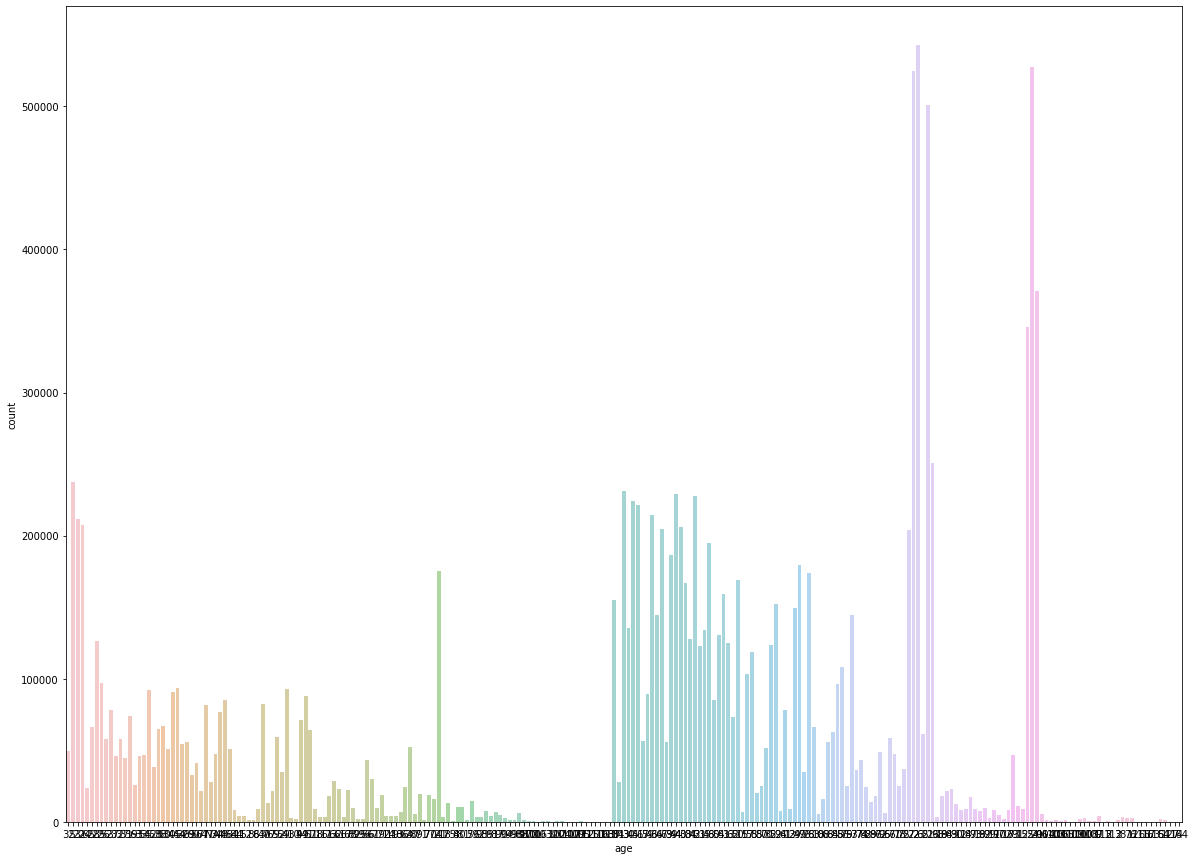

--------------------------------------------------
col :  fecha_alta


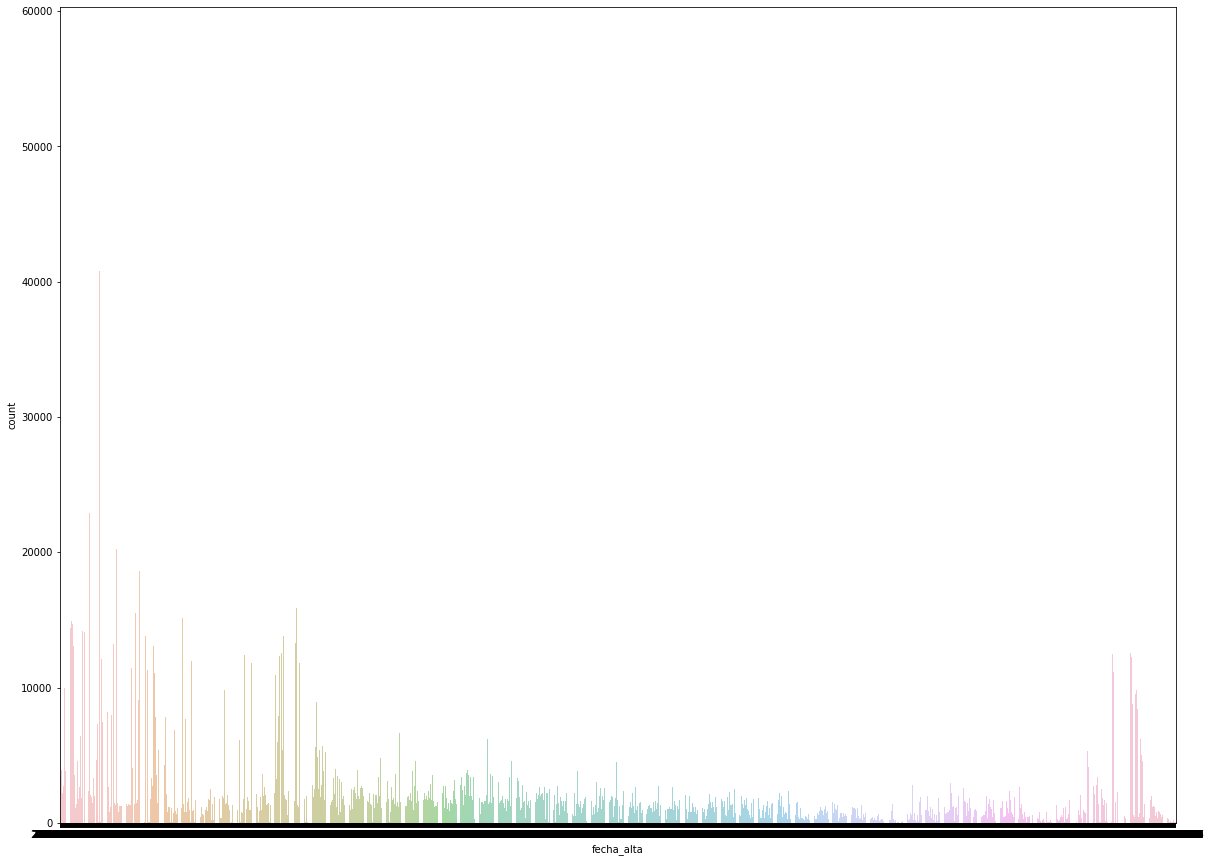

--------------------------------------------------
col :  ind_nuevo


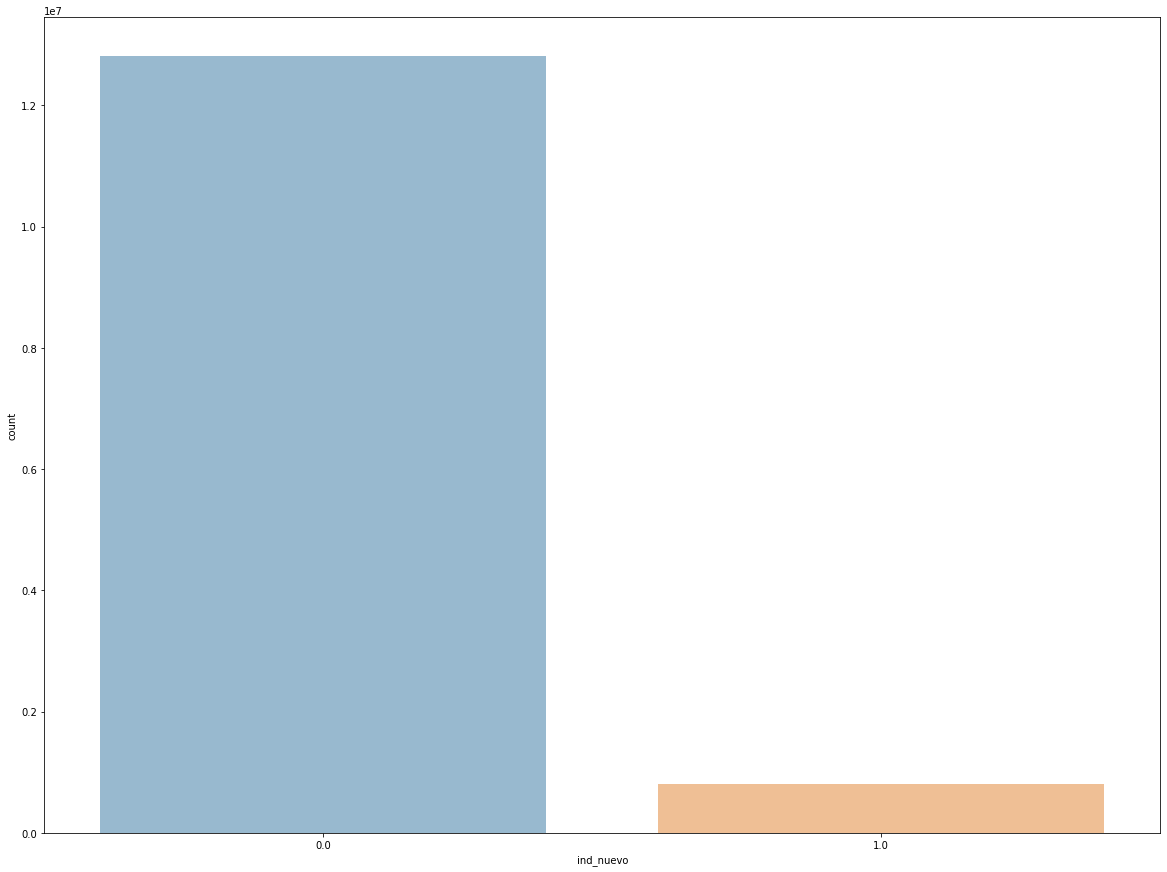

--------------------------------------------------
col :  antiguedad


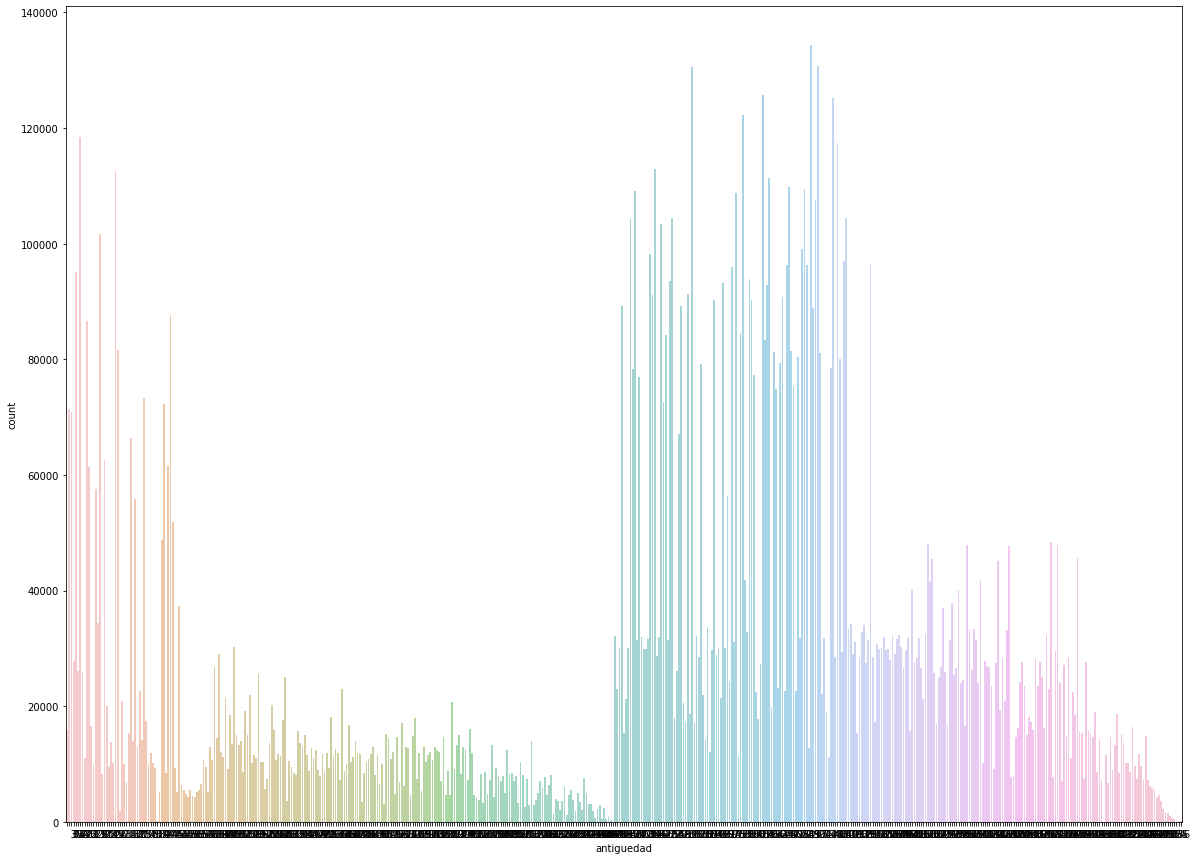

--------------------------------------------------
col :  indrel


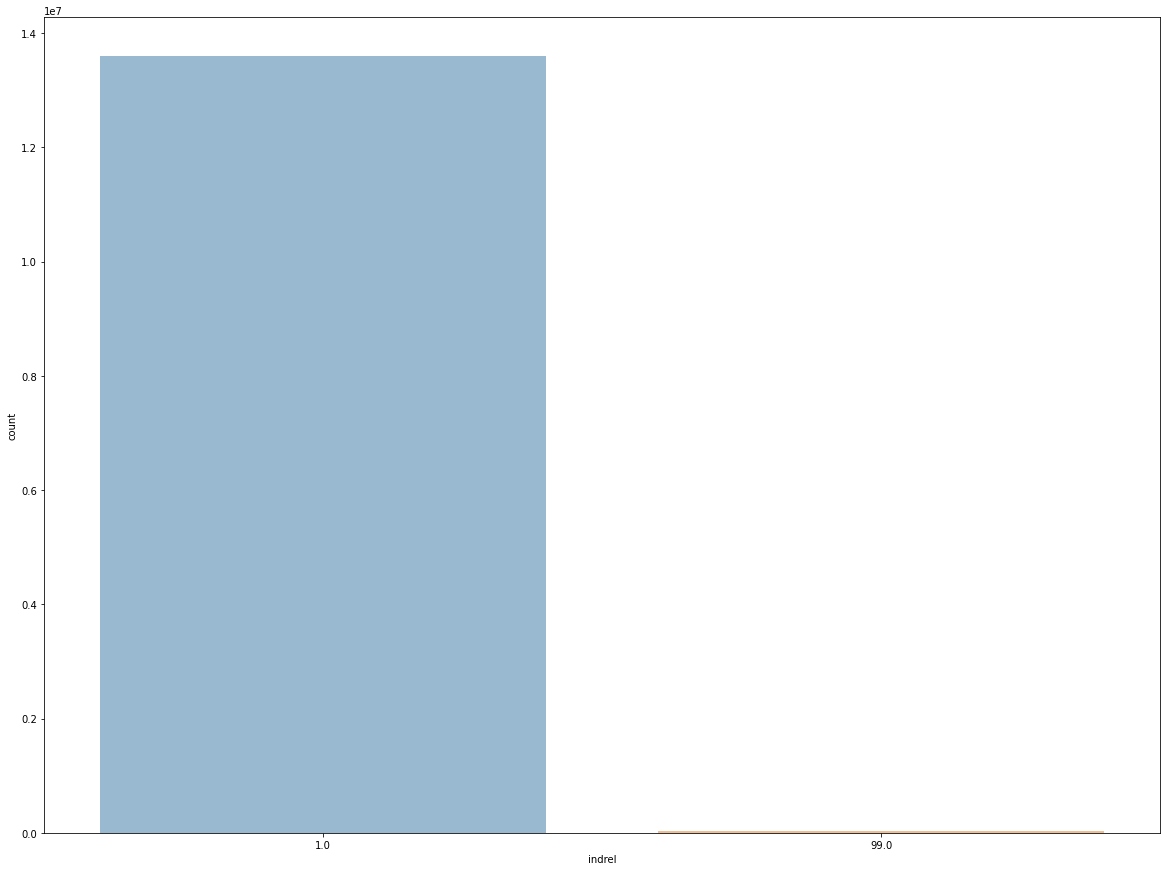

--------------------------------------------------
col :  ult_fec_cli_1t


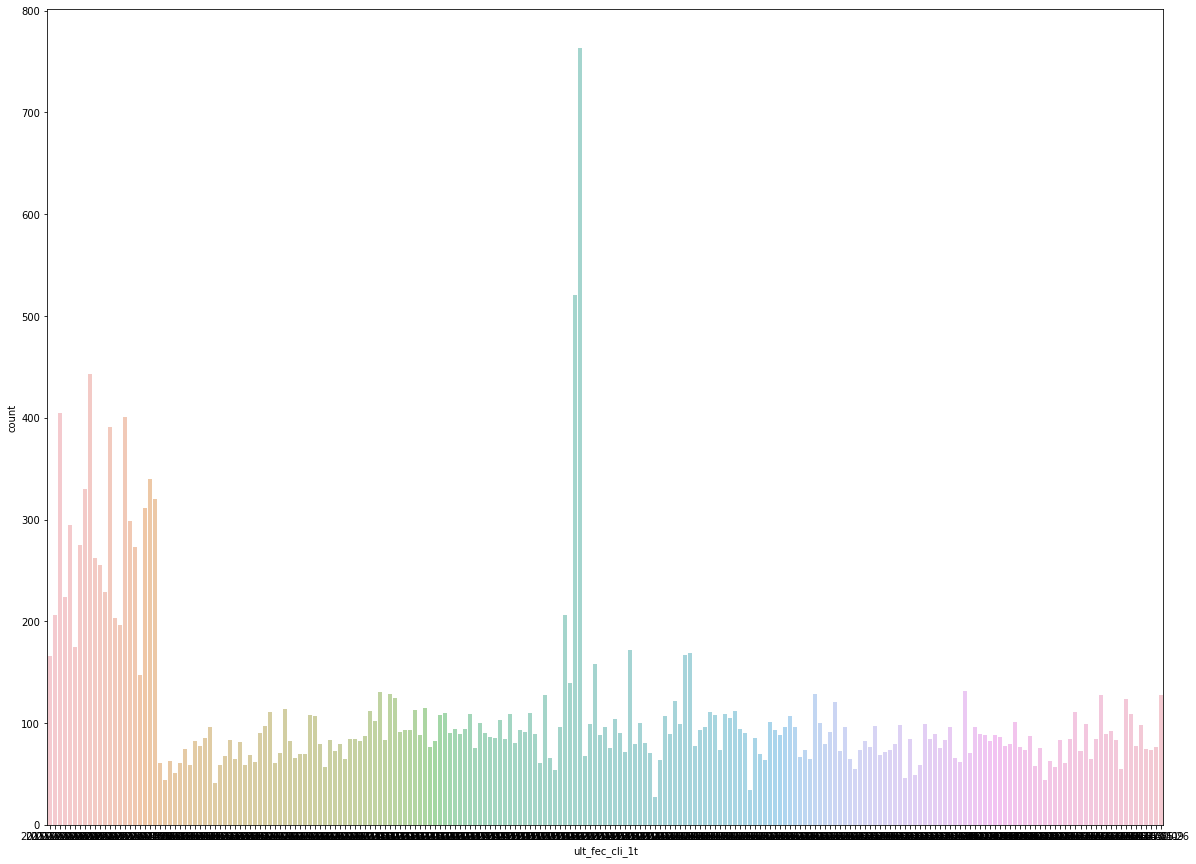

--------------------------------------------------
col :  indrel_1mes


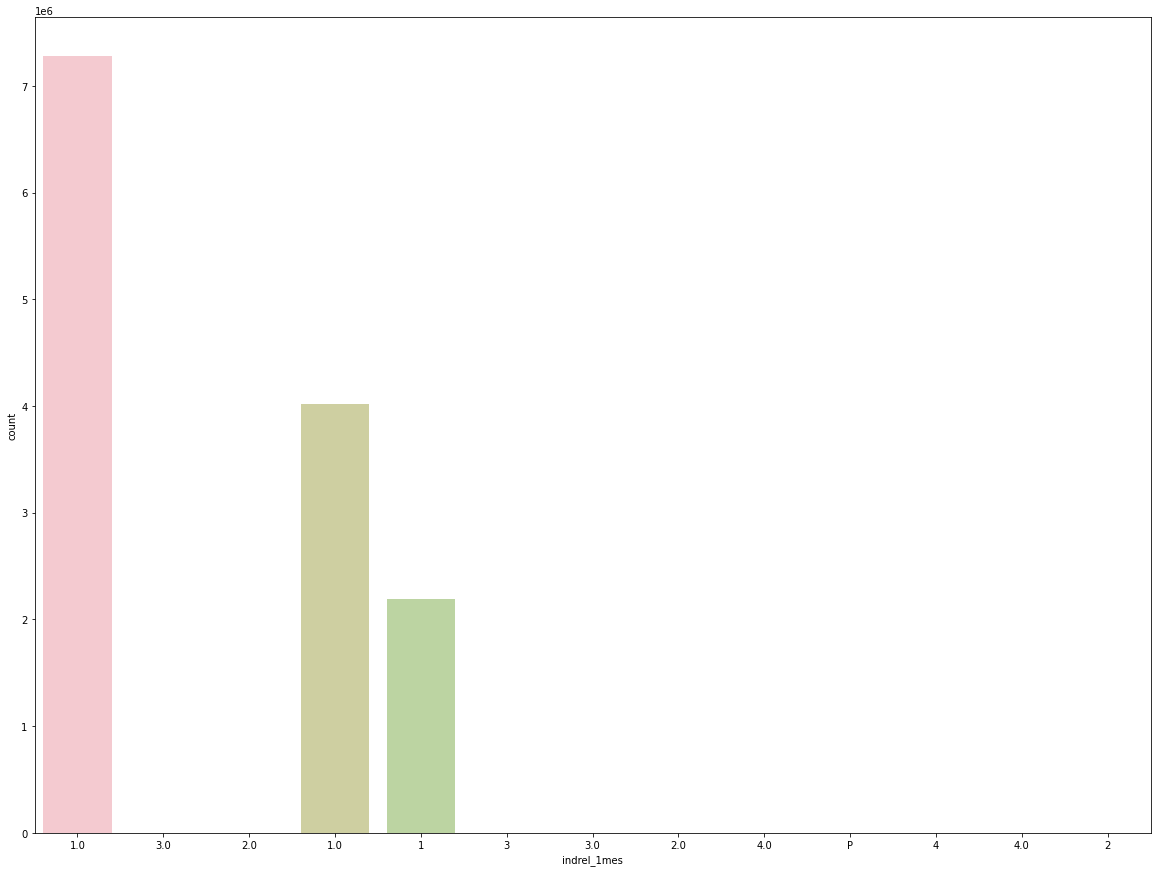

--------------------------------------------------
col :  tiprel_1mes


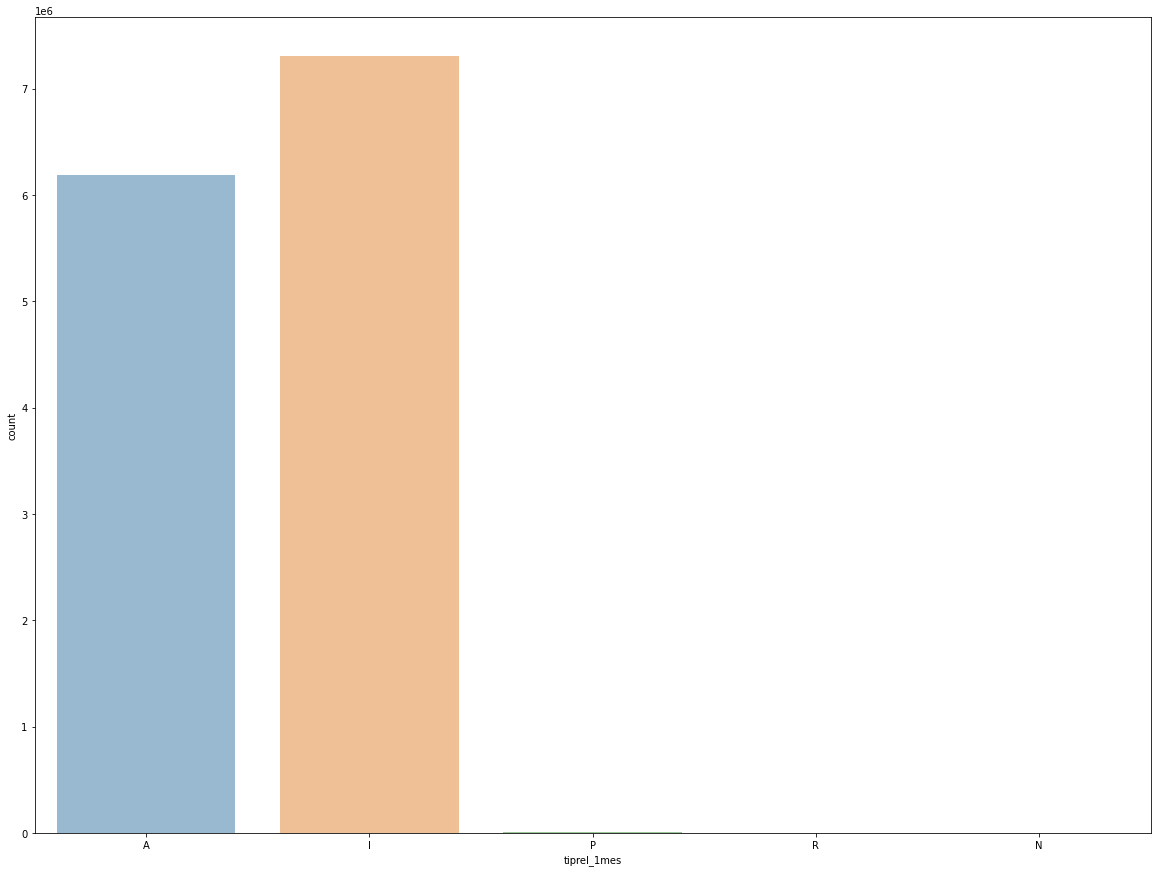

--------------------------------------------------
col :  indresi


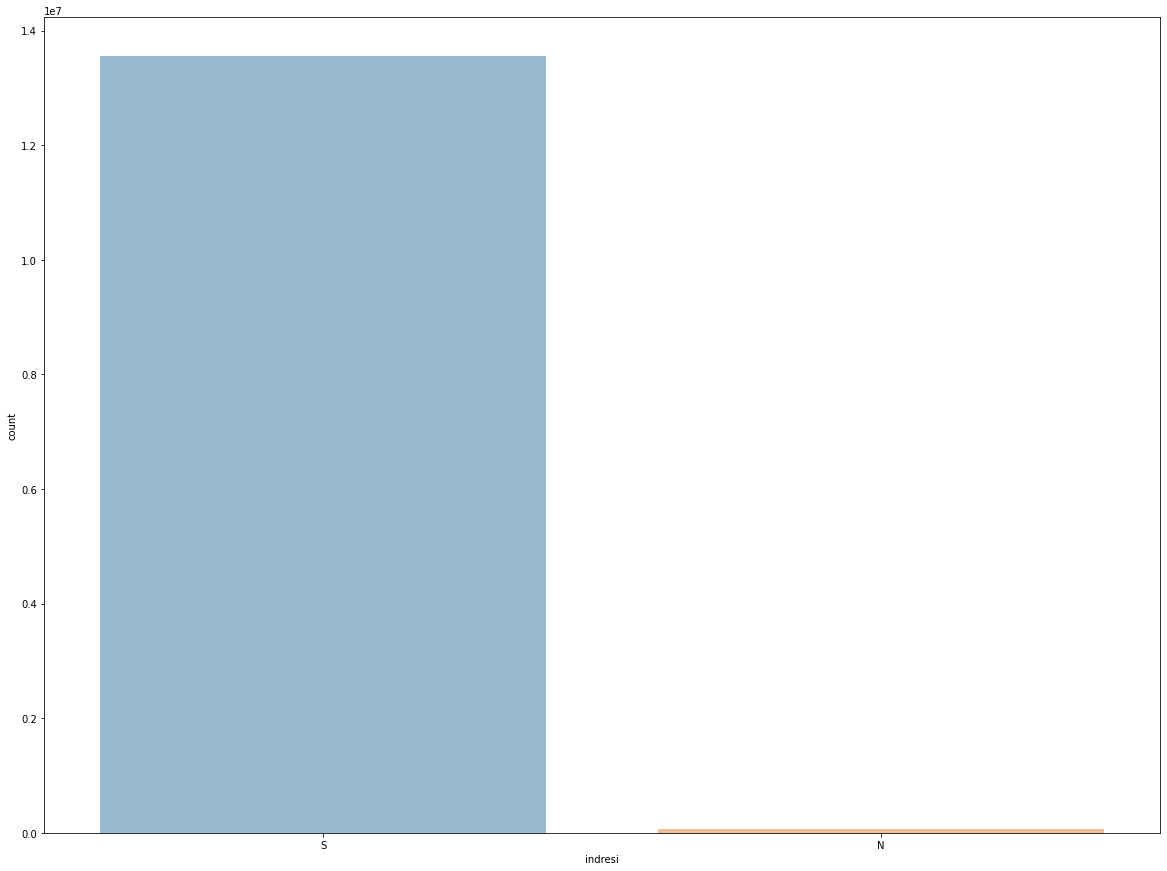

--------------------------------------------------
col :  indext


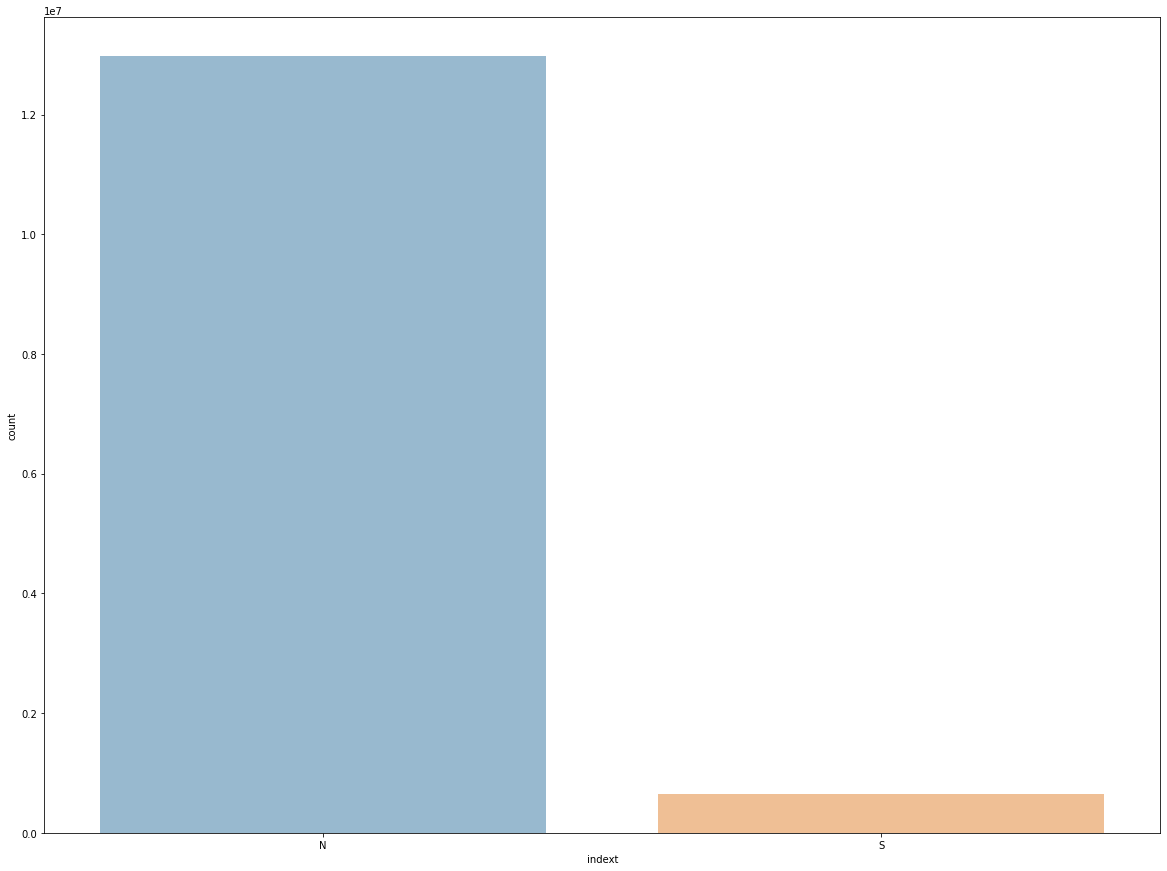

--------------------------------------------------
col :  conyuemp


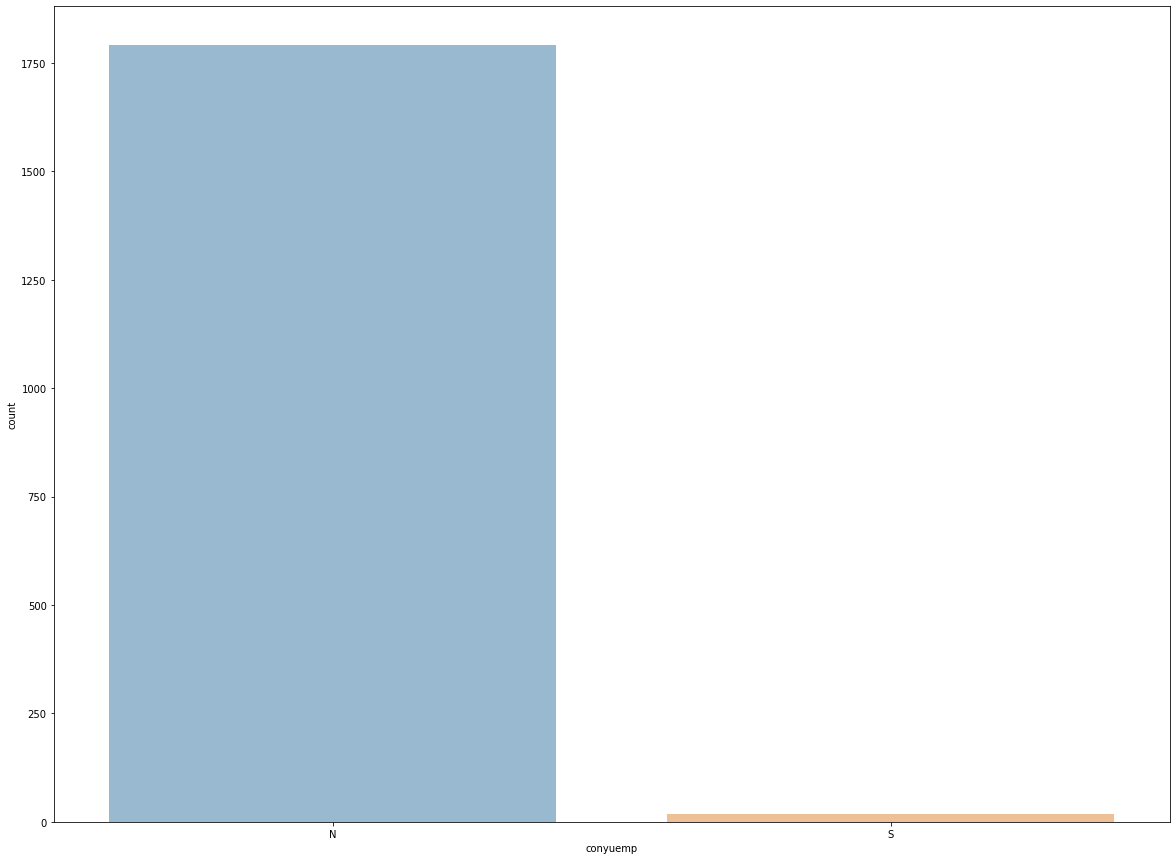

--------------------------------------------------
col :  canal_entrada


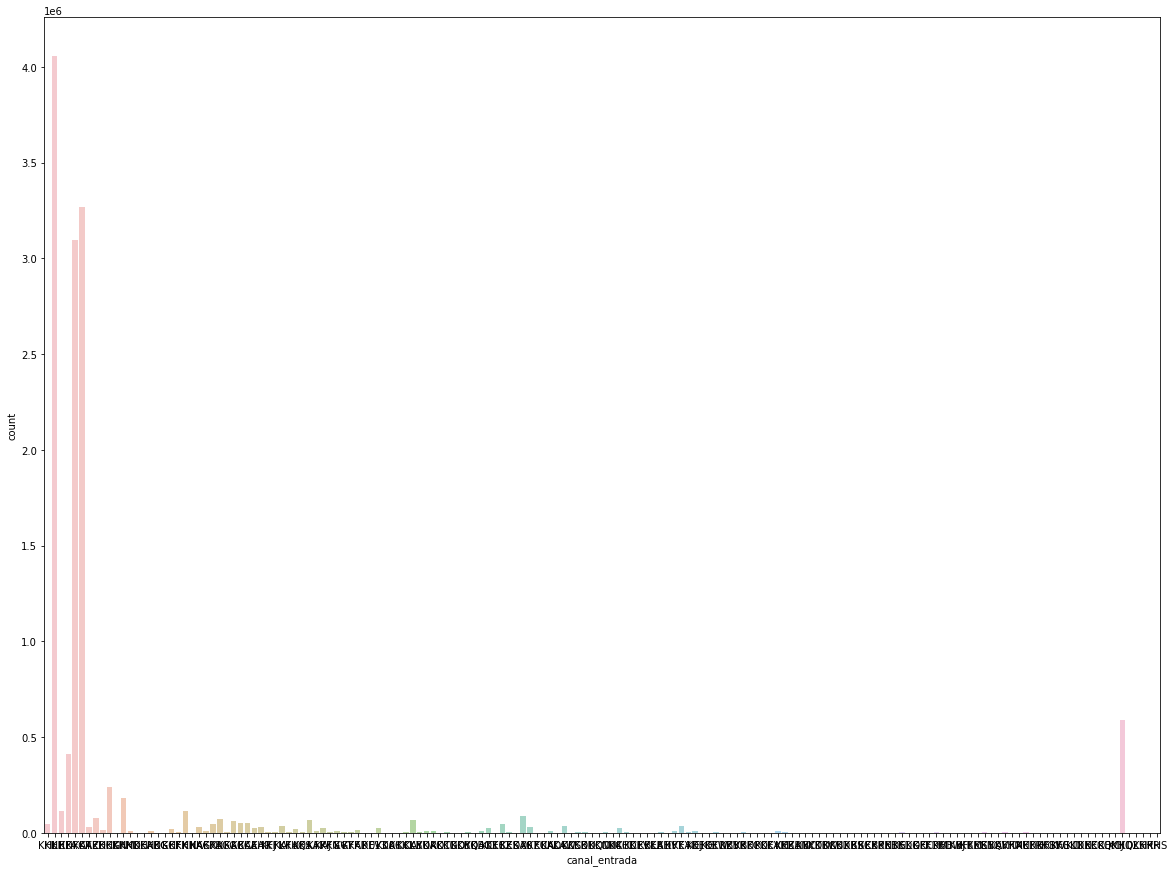

--------------------------------------------------
col :  indfall


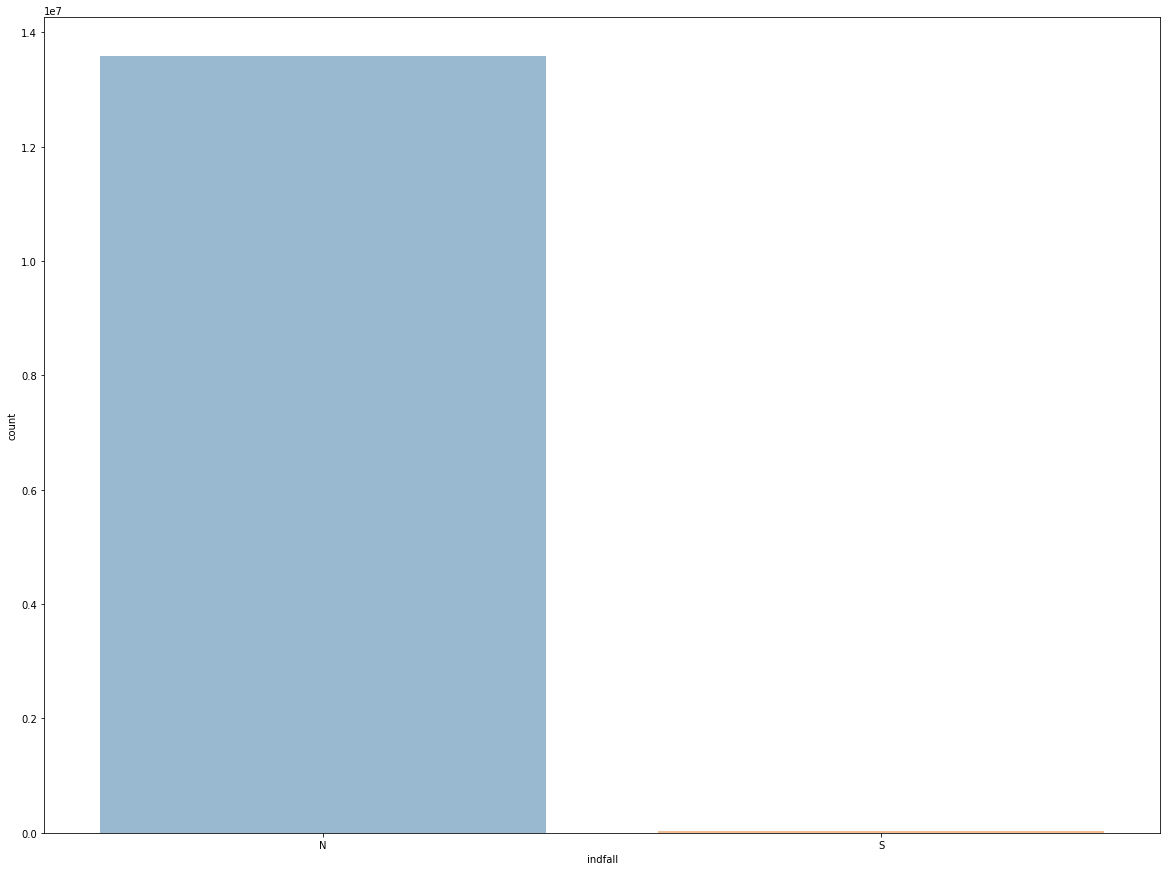

--------------------------------------------------
col :  tipodom


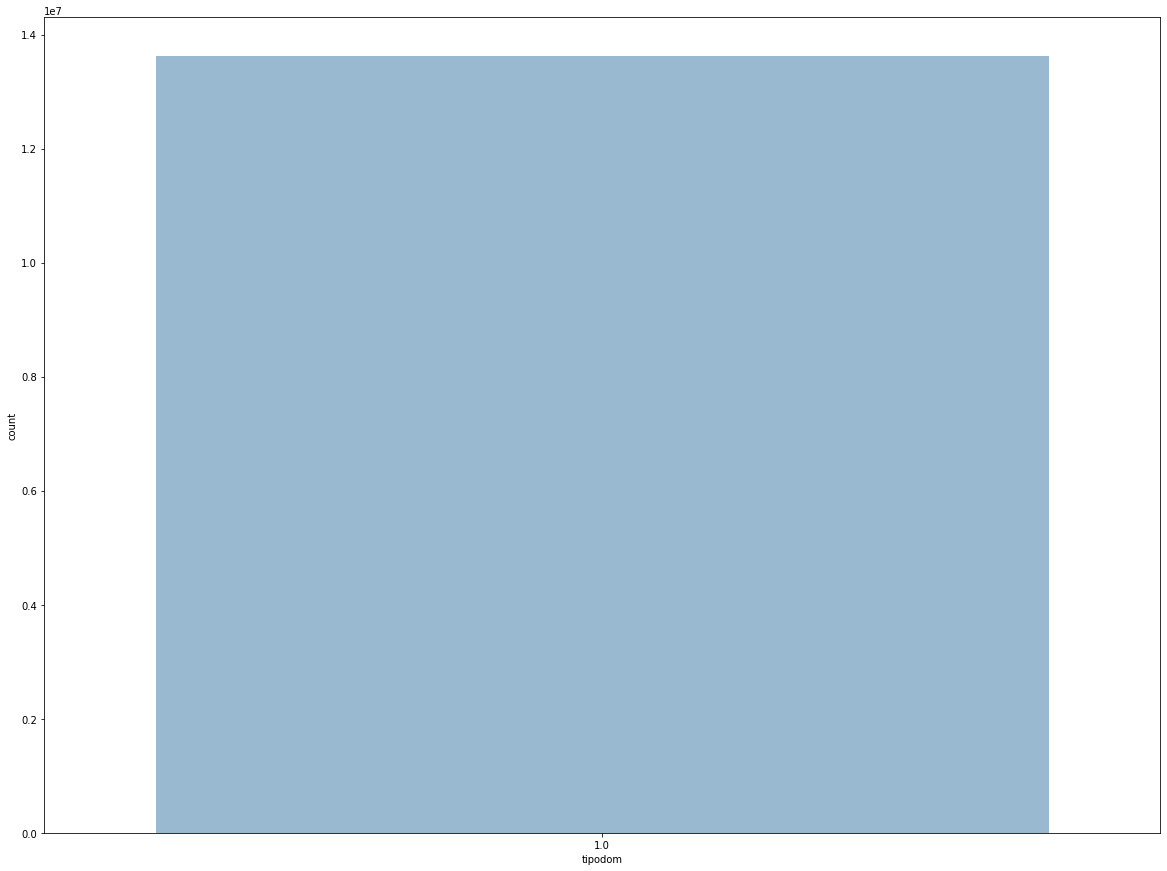

--------------------------------------------------
col :  cod_prov


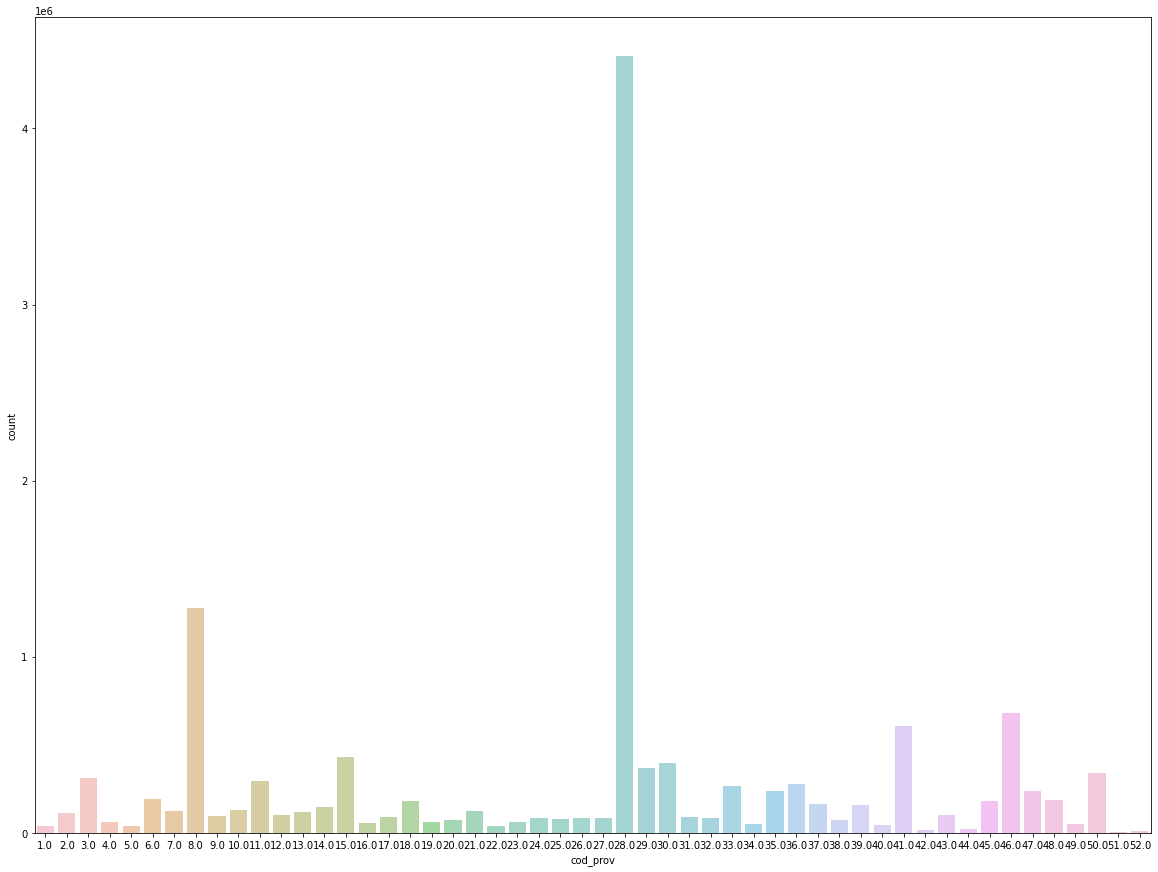

--------------------------------------------------
col :  nomprov


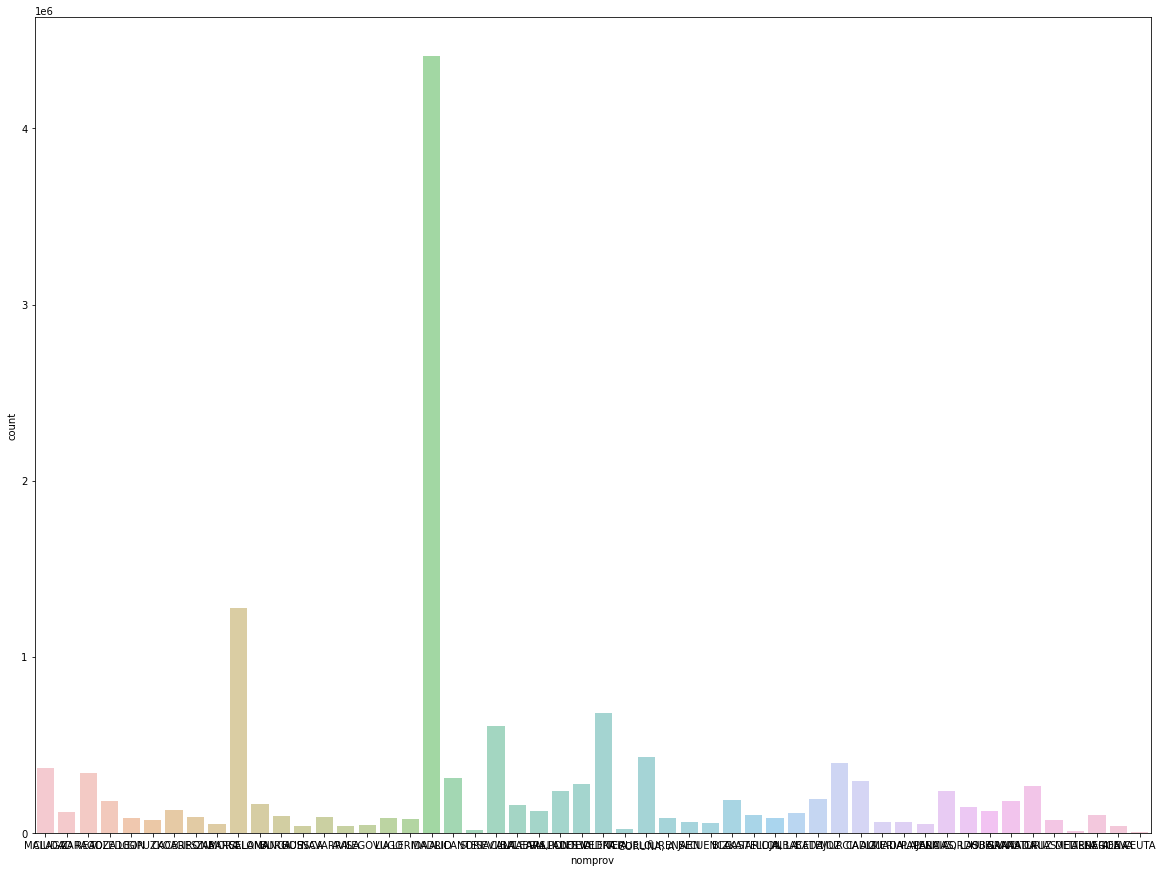

--------------------------------------------------
col :  ind_actividad_cliente


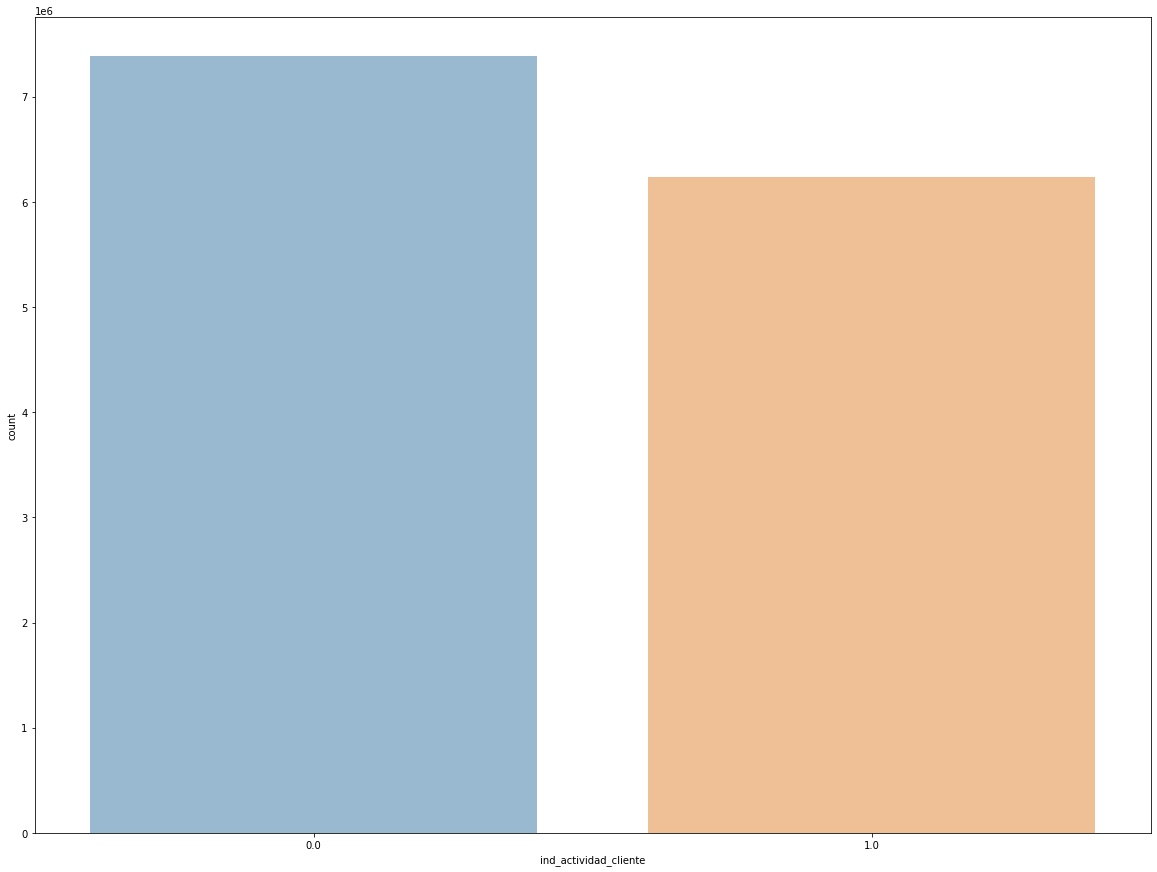

--------------------------------------------------
col :  segmento


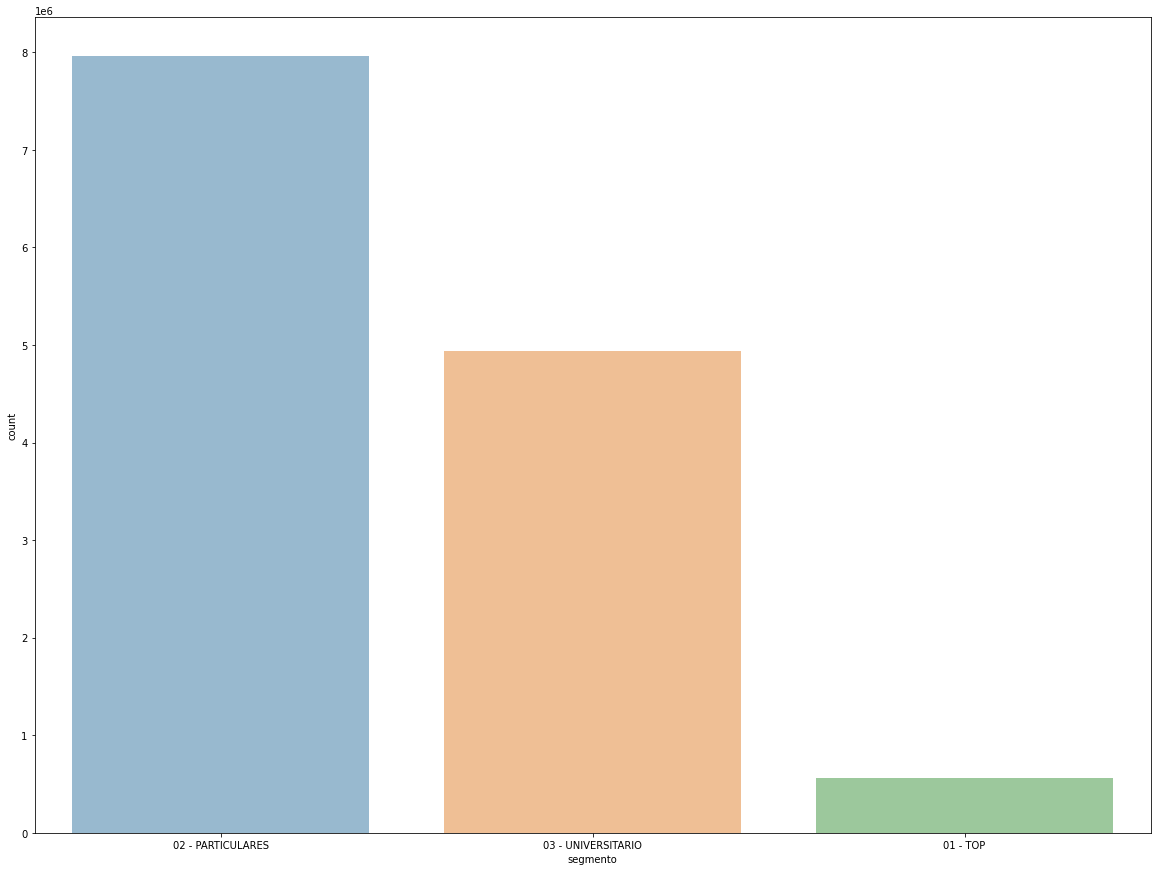

--------------------------------------------------
col :  ind_ahor_fin_ult1


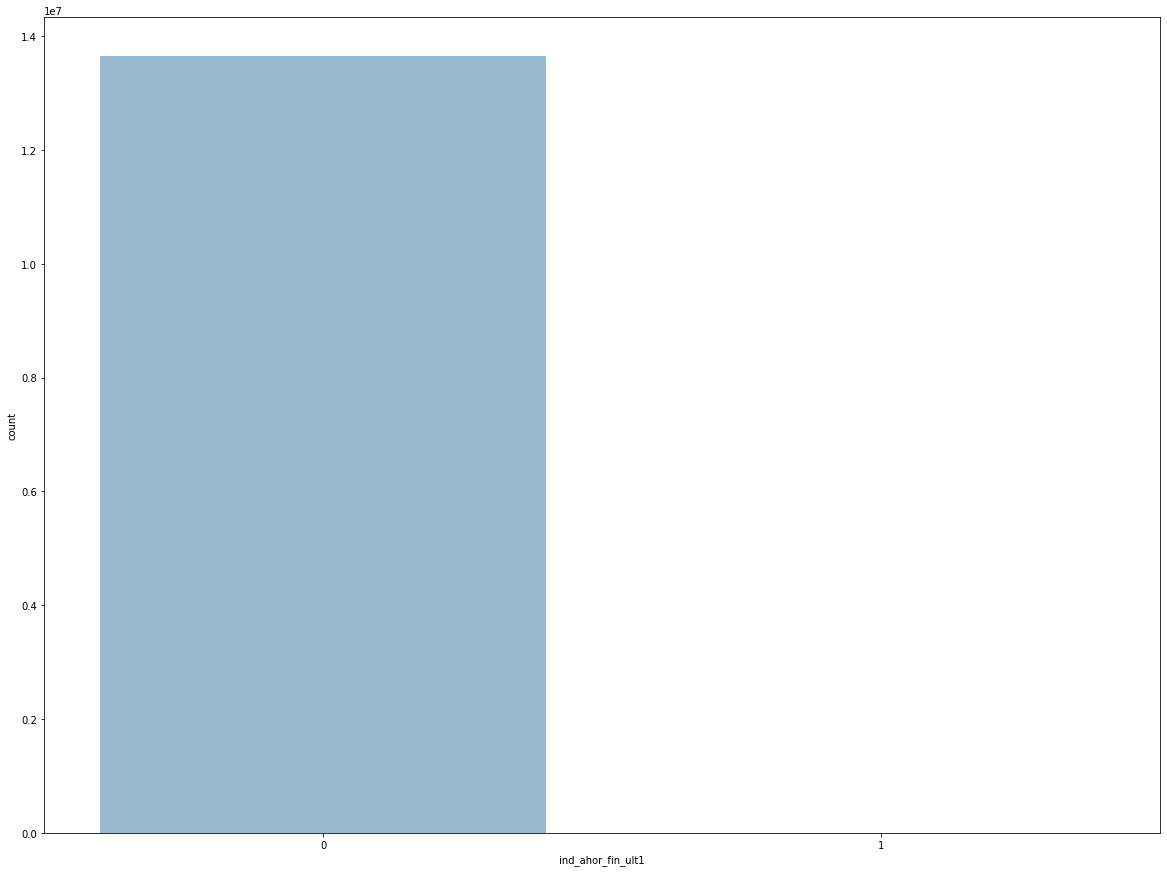

--------------------------------------------------
col :  ind_aval_fin_ult1


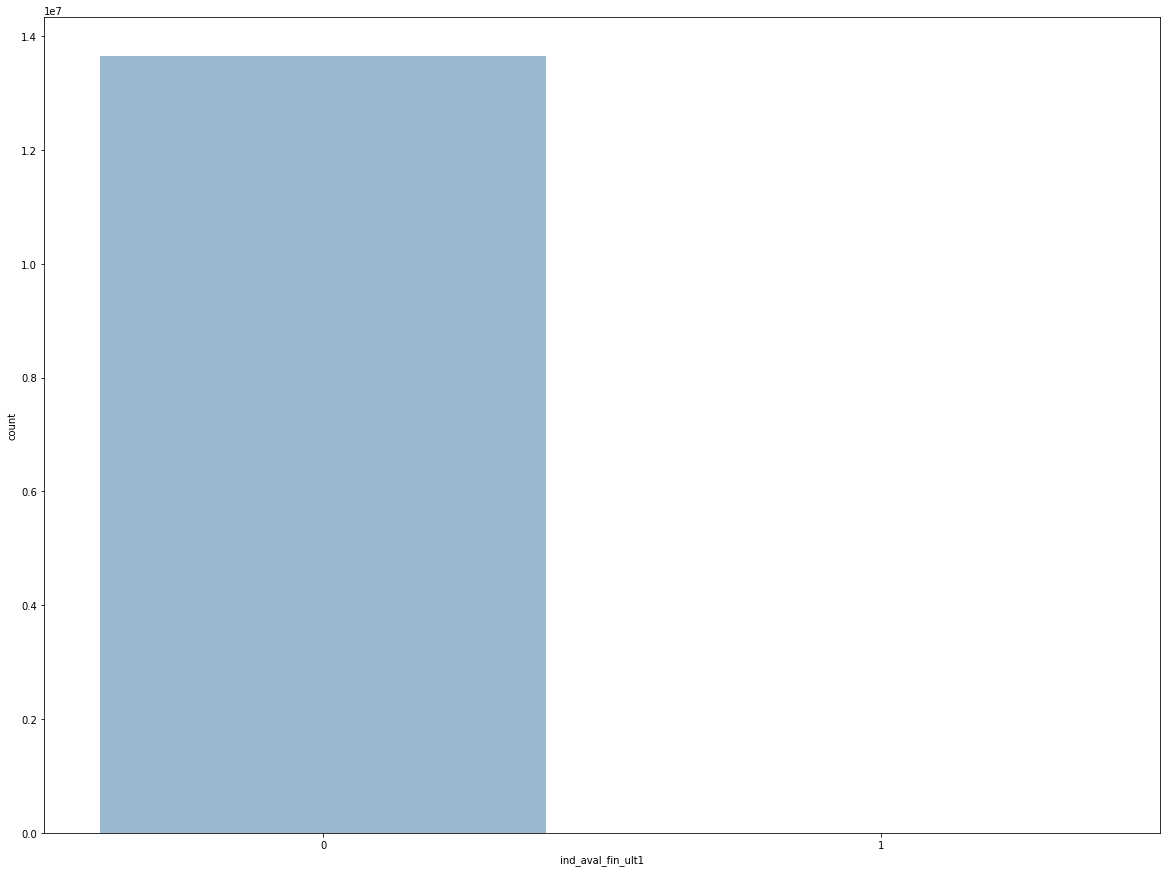

--------------------------------------------------
col :  ind_cco_fin_ult1


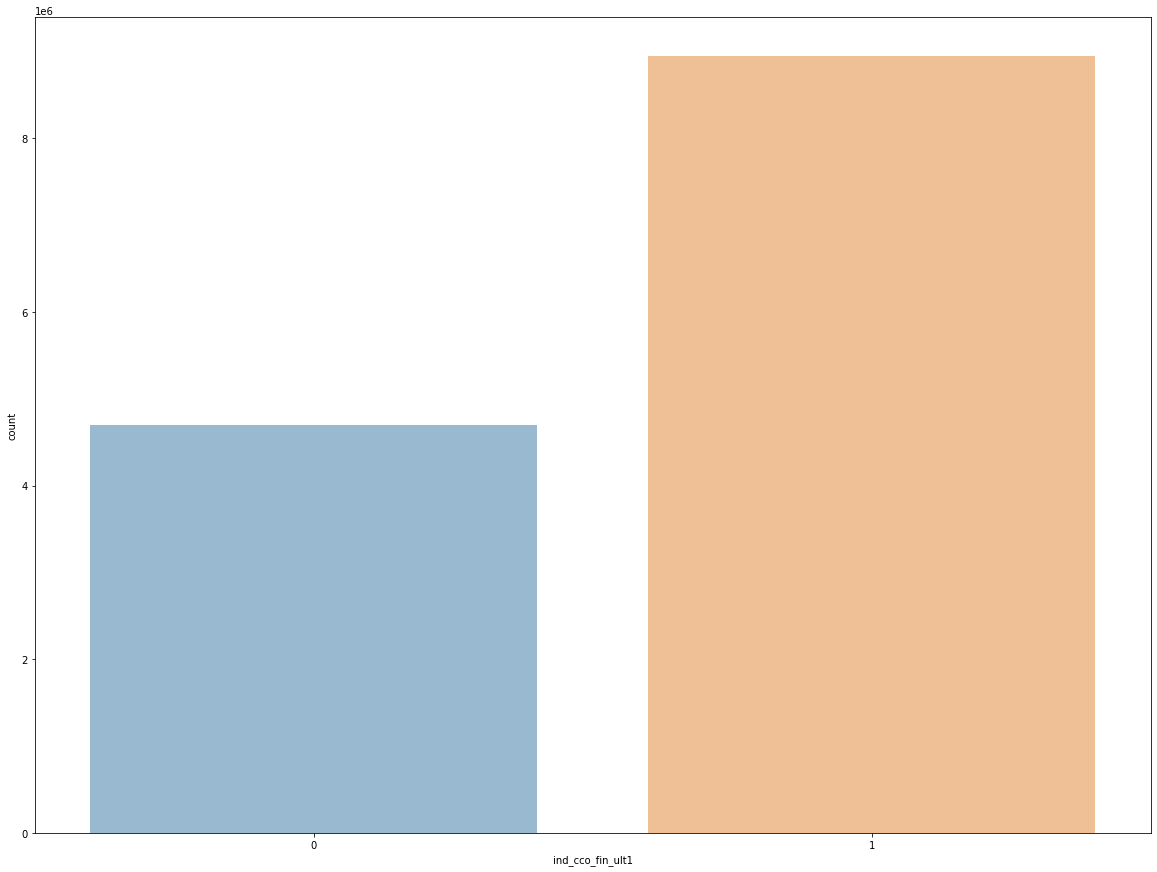

--------------------------------------------------
col :  ind_cder_fin_ult1


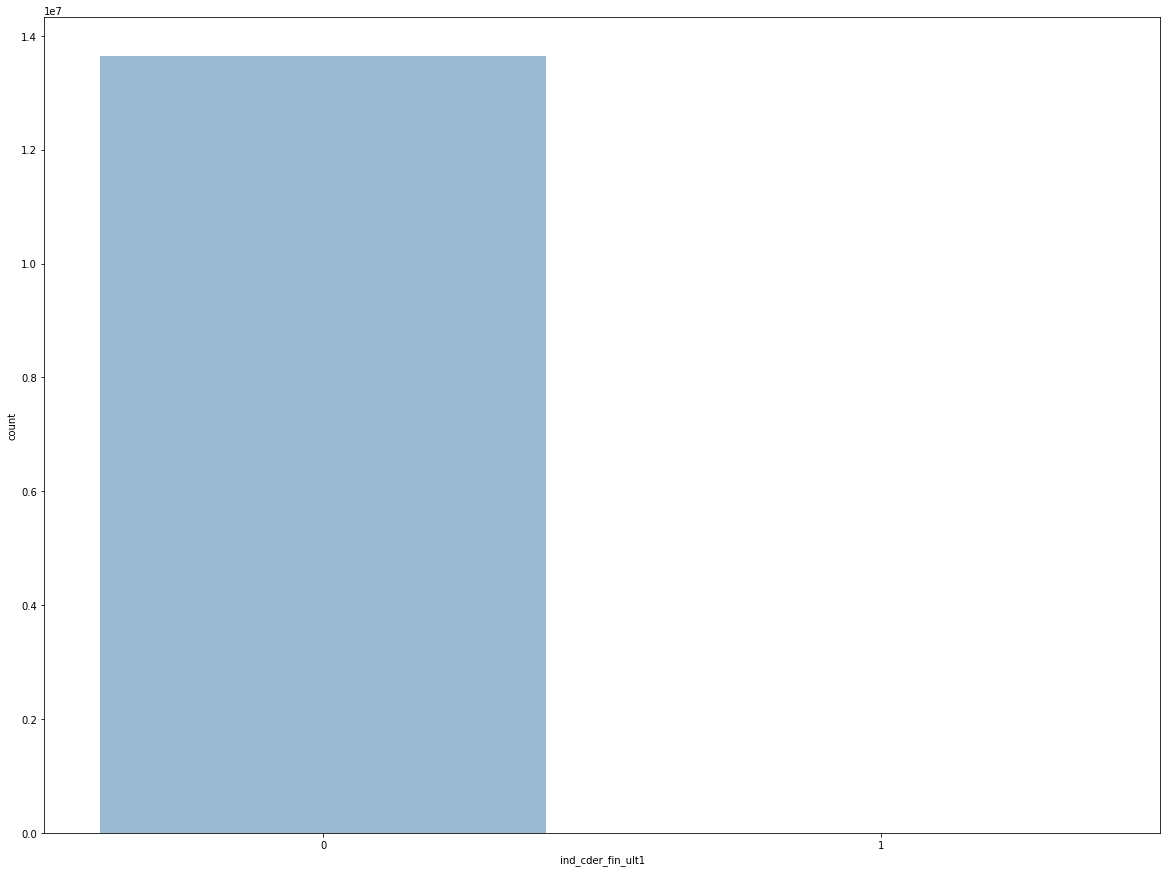

--------------------------------------------------
col :  ind_cno_fin_ult1


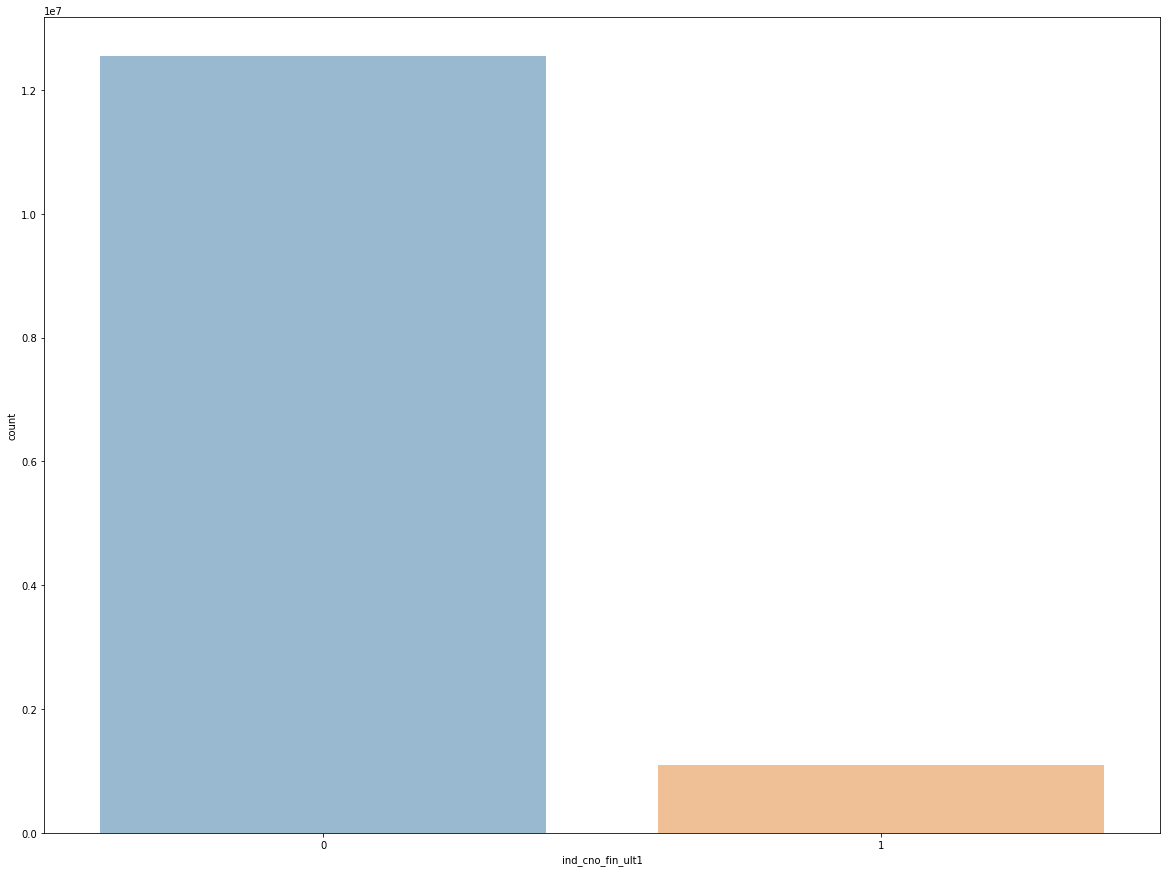

--------------------------------------------------
col :  ind_ctju_fin_ult1


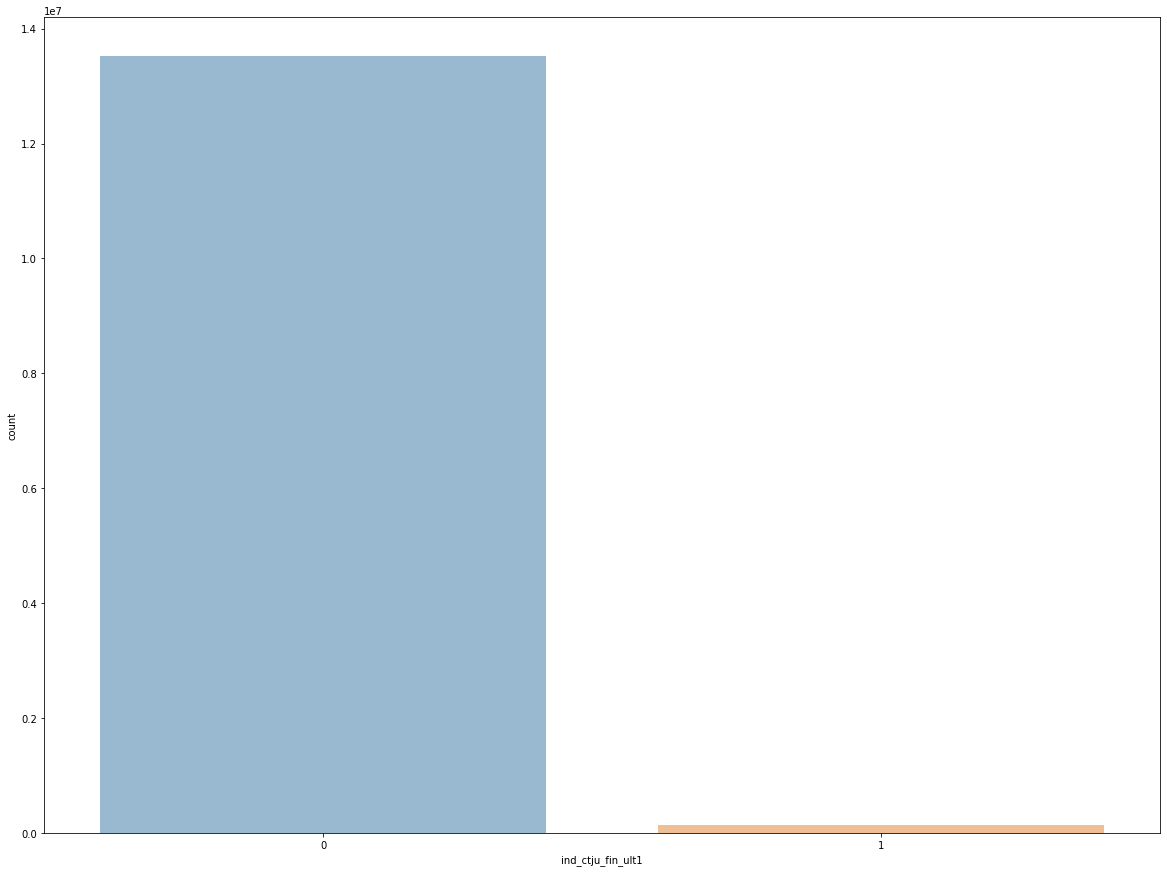

--------------------------------------------------
col :  ind_ctma_fin_ult1


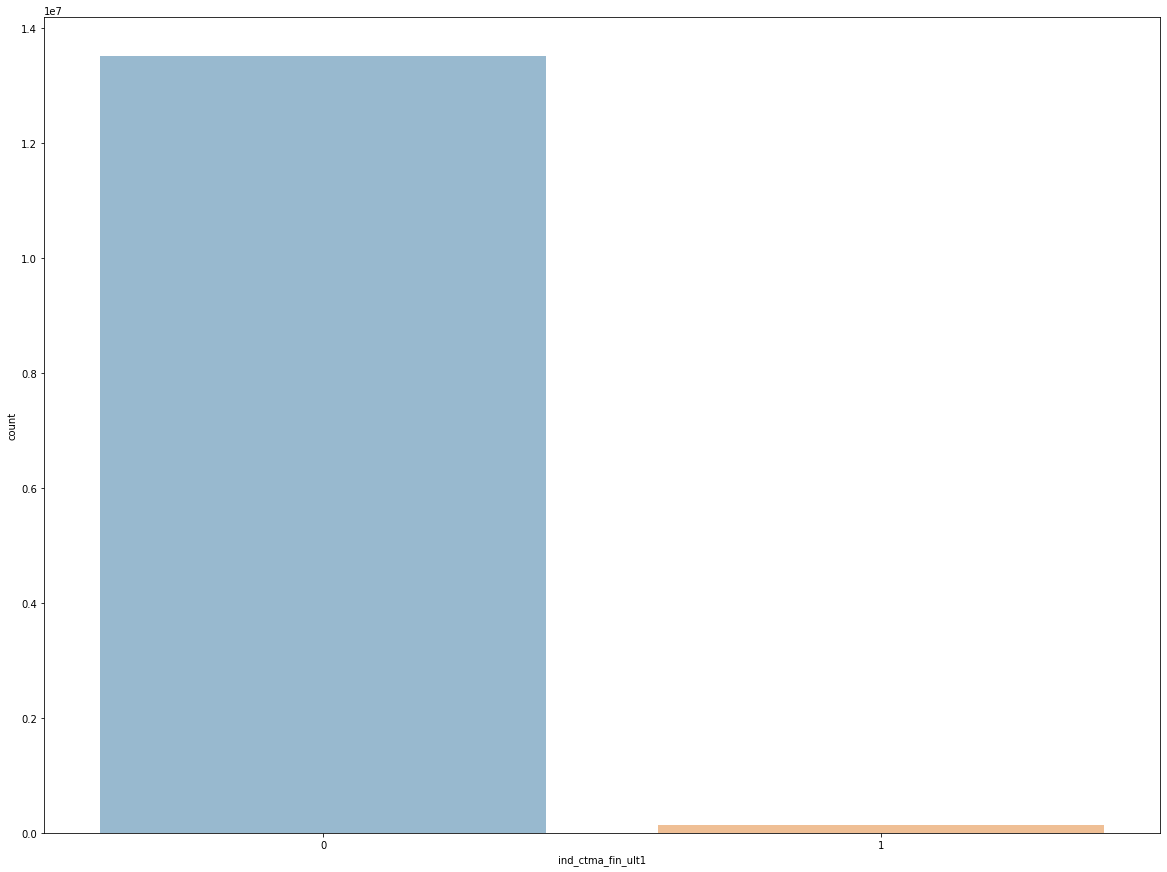

--------------------------------------------------
col :  ind_ctop_fin_ult1


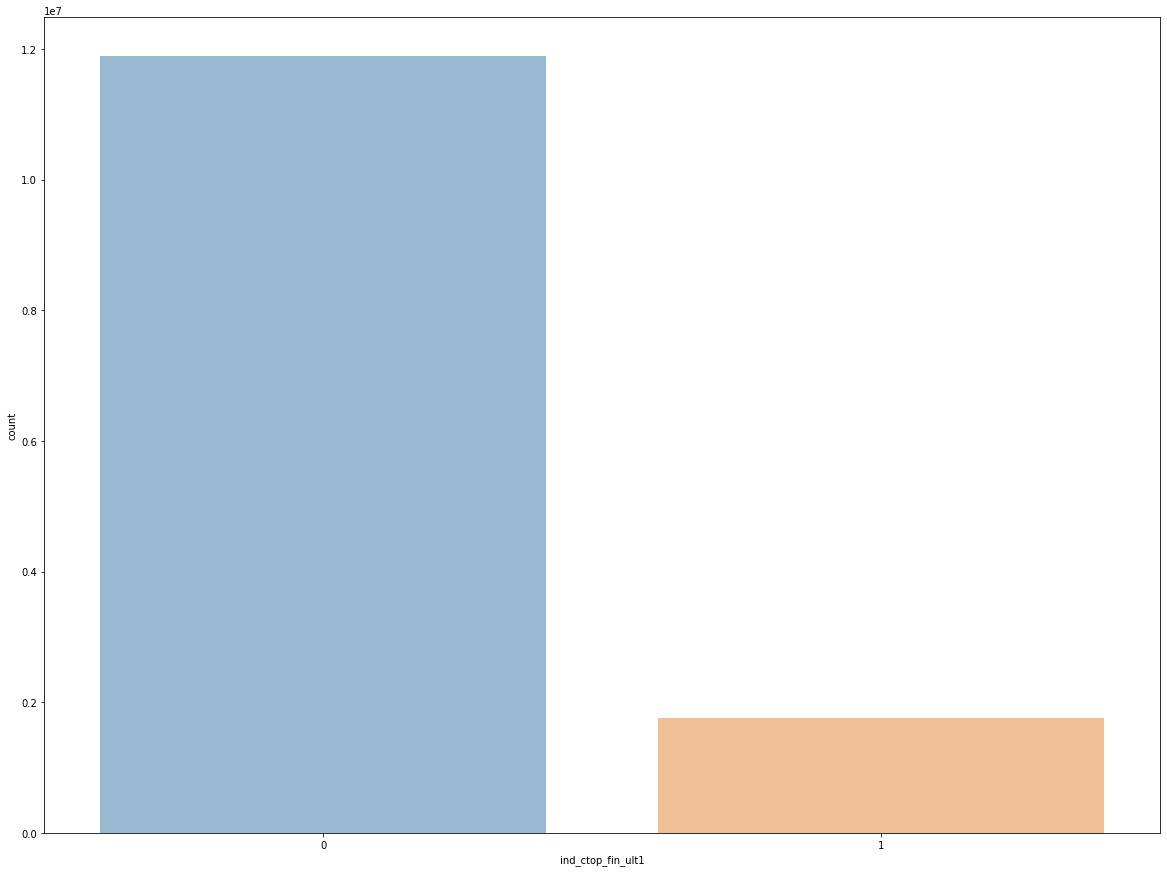

--------------------------------------------------
col :  ind_ctpp_fin_ult1


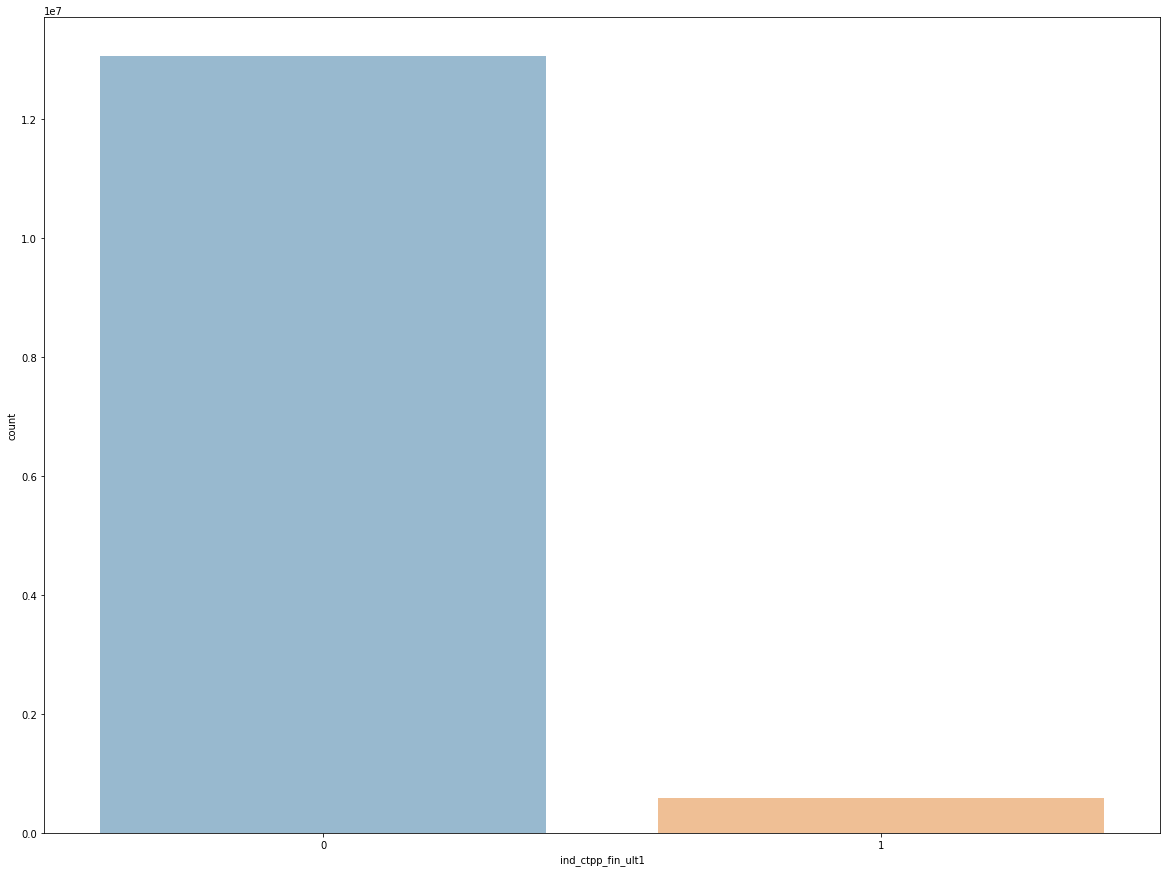

--------------------------------------------------
col :  ind_deco_fin_ult1


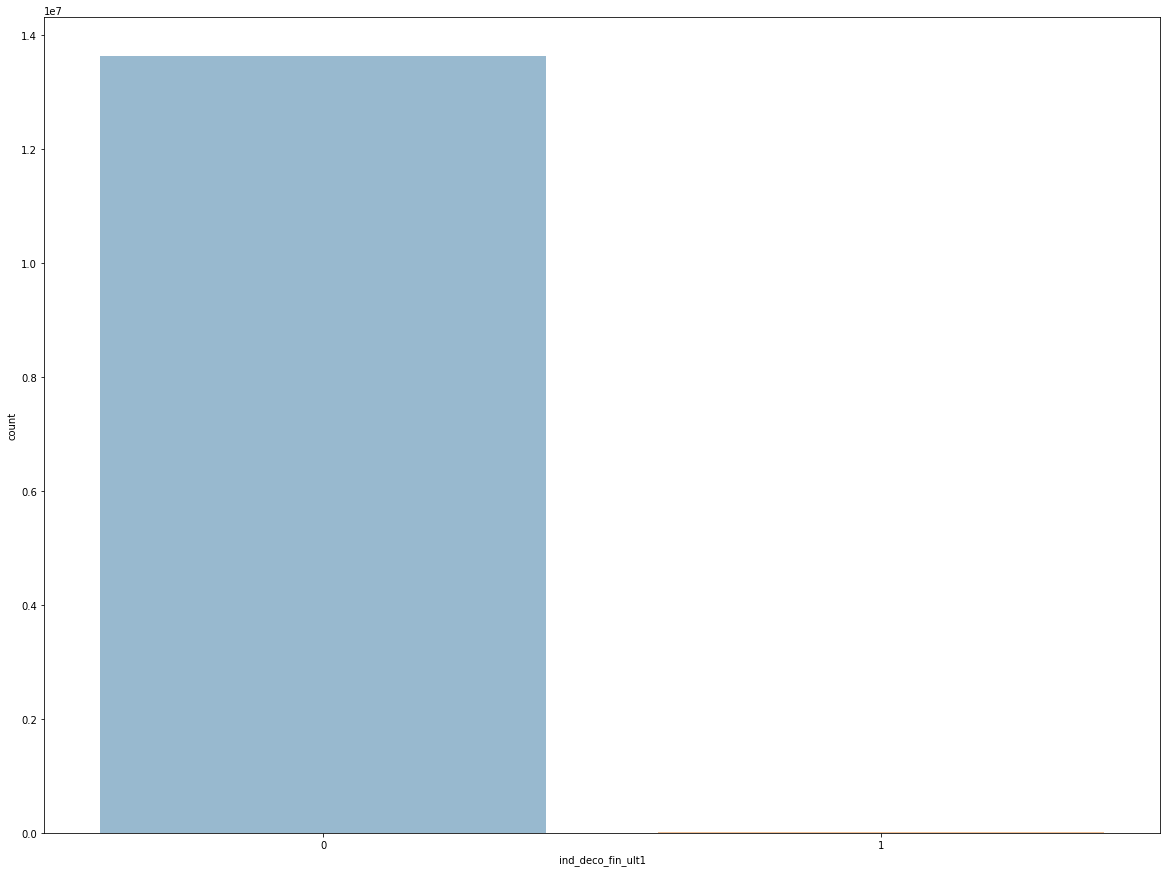

--------------------------------------------------
col :  ind_deme_fin_ult1


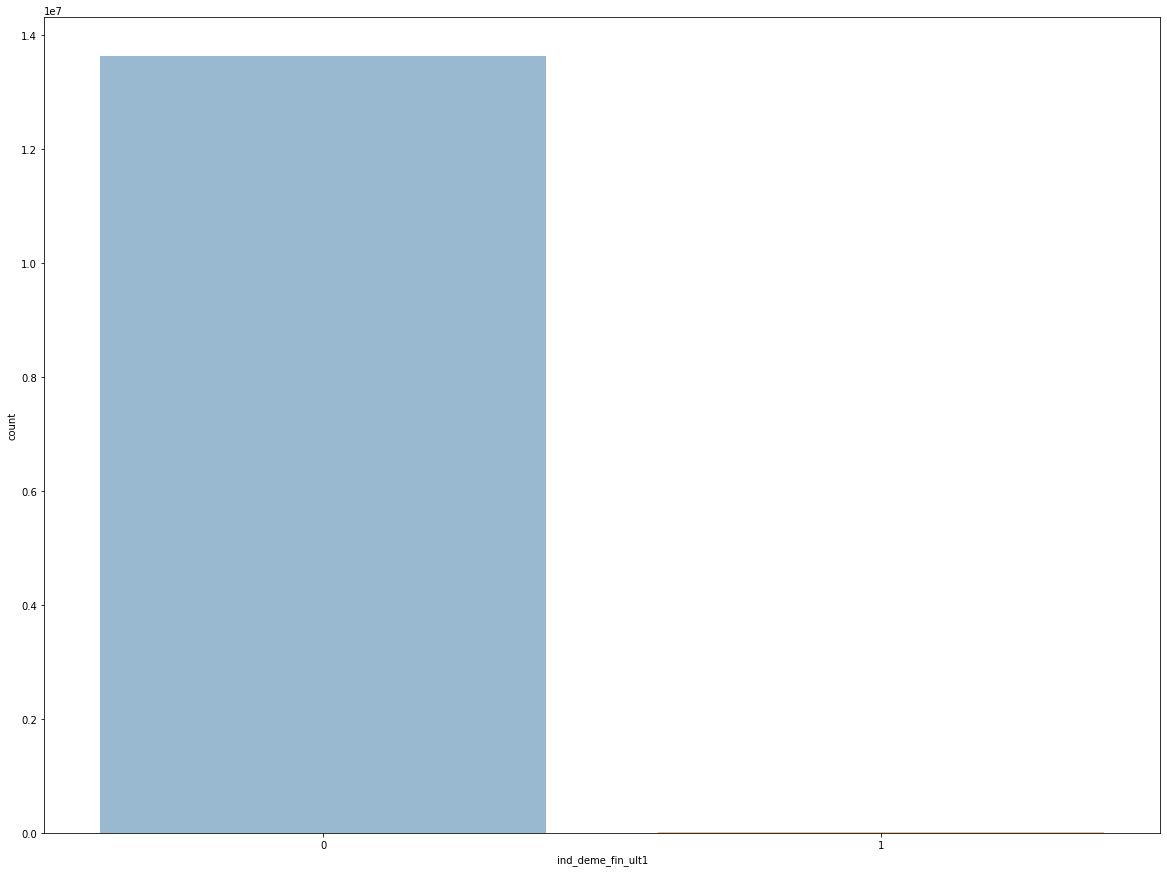

--------------------------------------------------
col :  ind_dela_fin_ult1


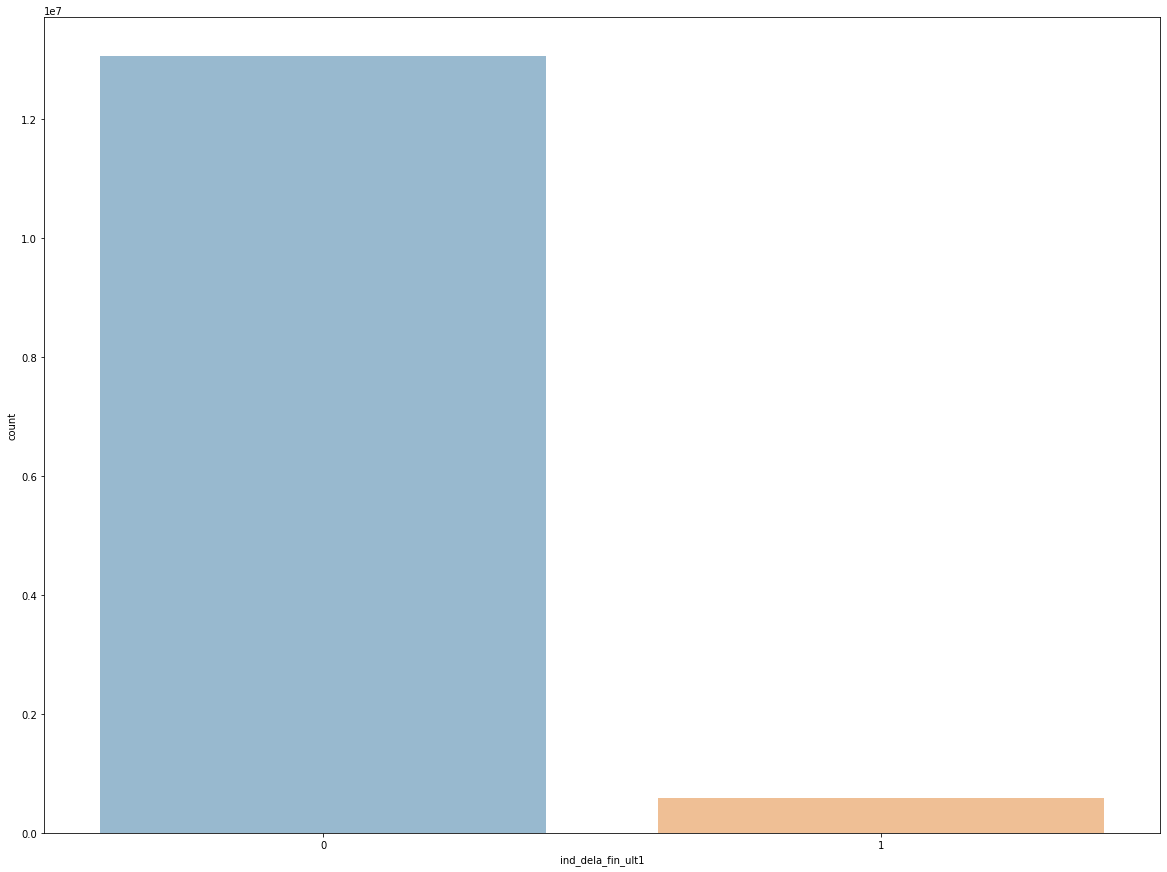

--------------------------------------------------
col :  ind_ecue_fin_ult1


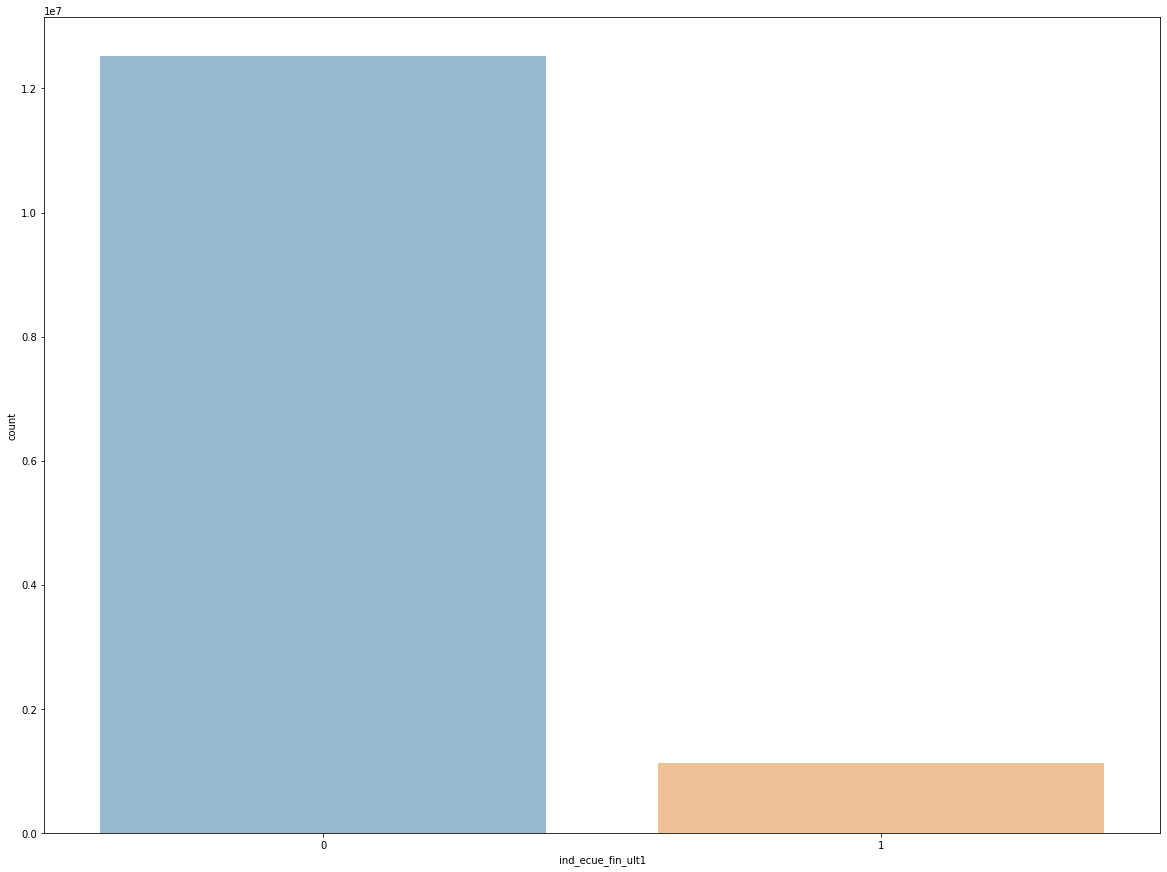

--------------------------------------------------
col :  ind_fond_fin_ult1


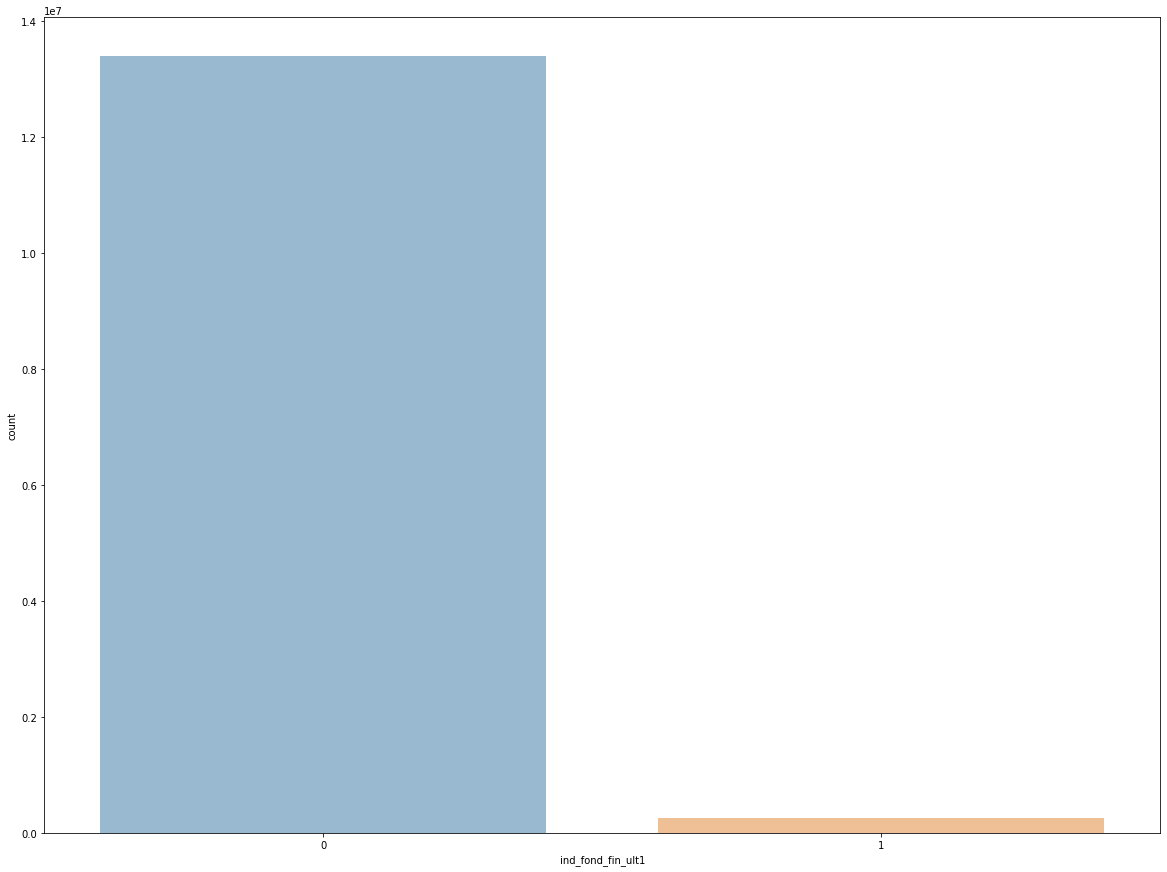

--------------------------------------------------
col :  ind_hip_fin_ult1


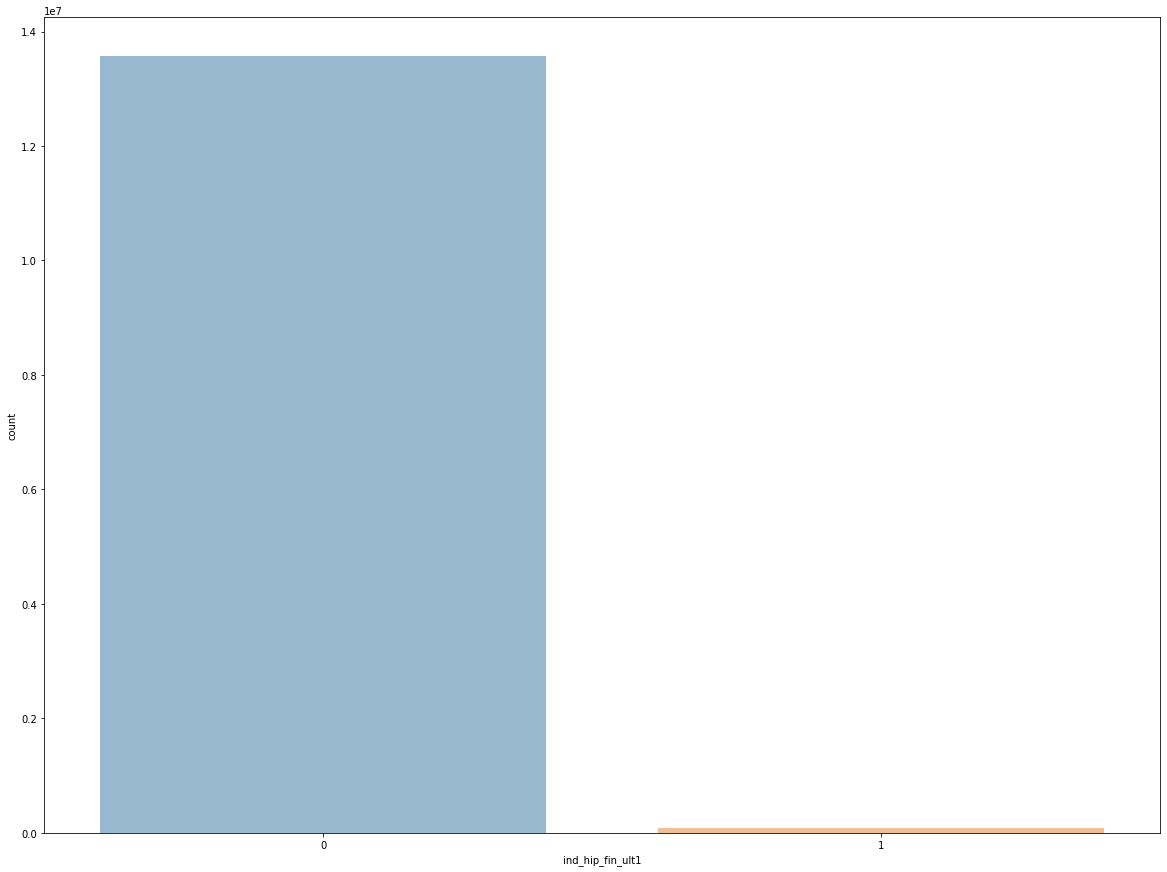

--------------------------------------------------
col :  ind_plan_fin_ult1


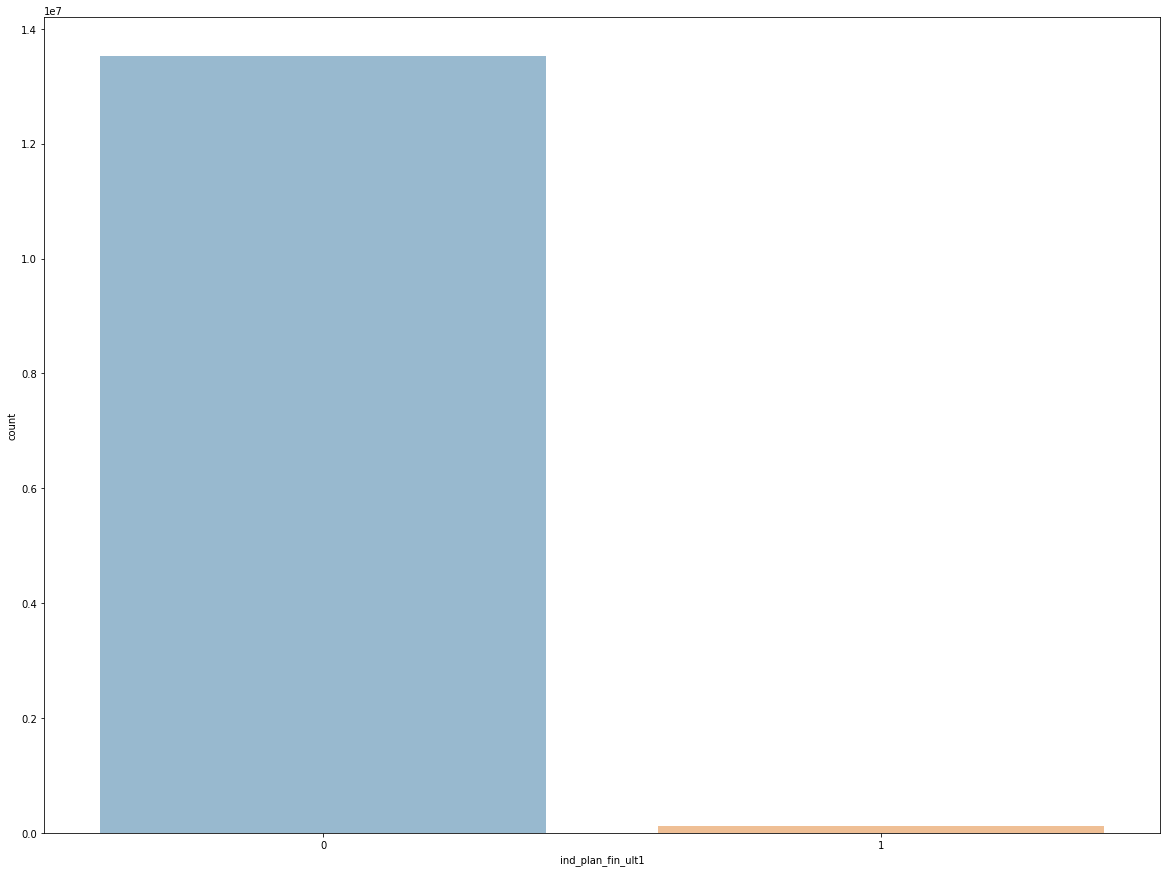

--------------------------------------------------
col :  ind_pres_fin_ult1


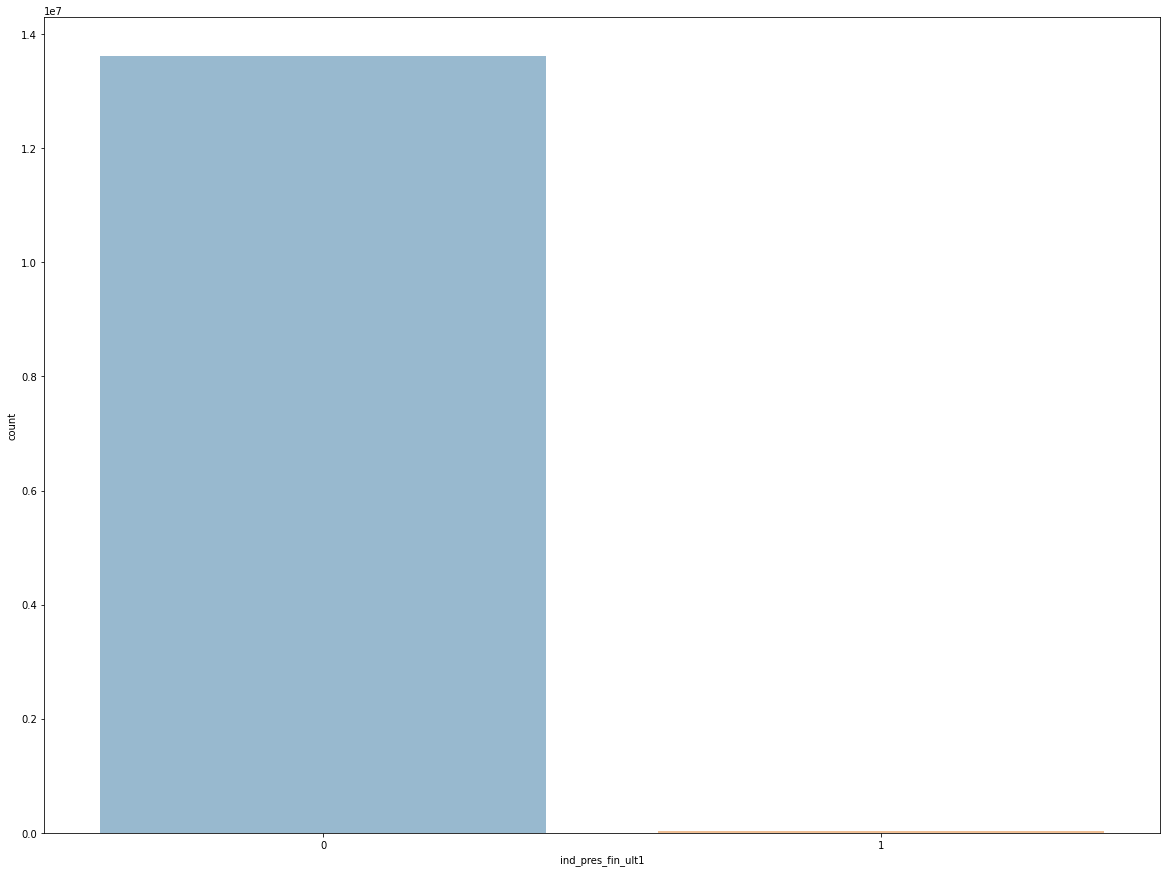

--------------------------------------------------
col :  ind_reca_fin_ult1


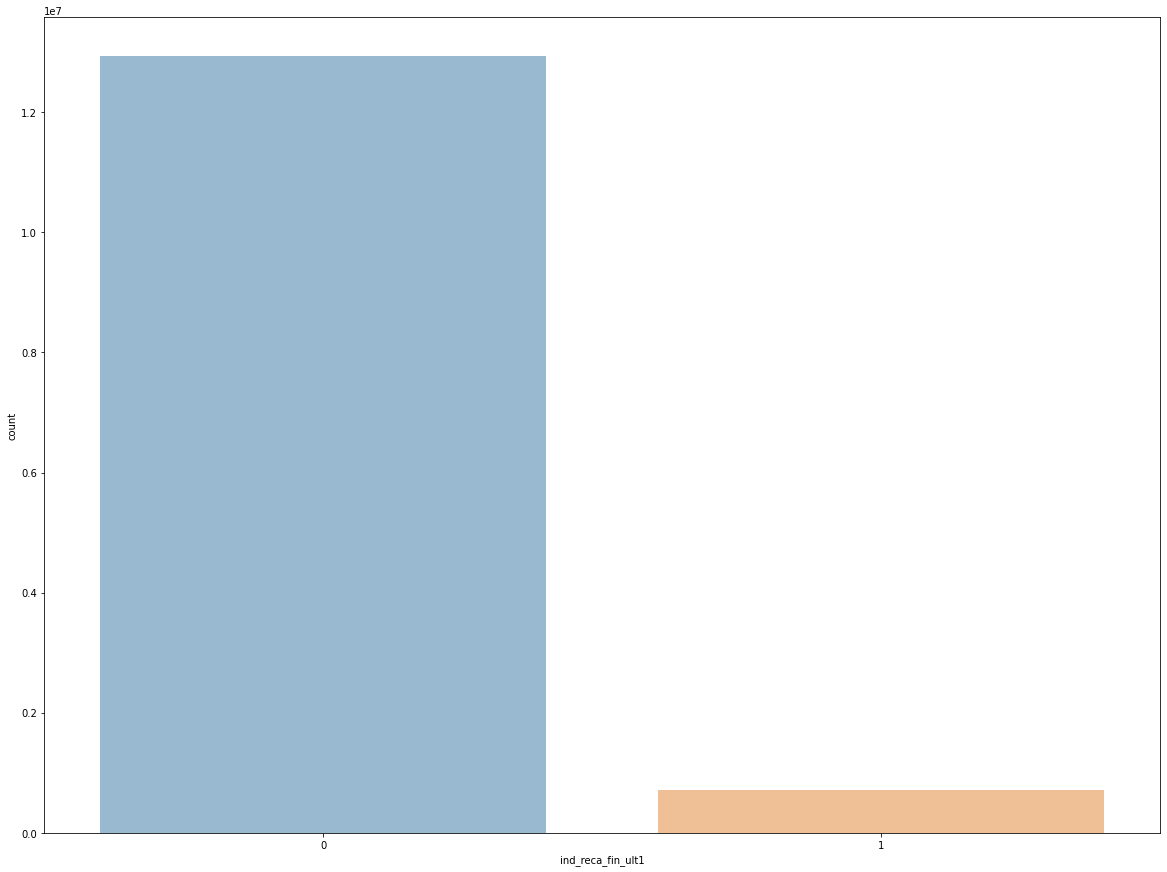

--------------------------------------------------
col :  ind_tjcr_fin_ult1


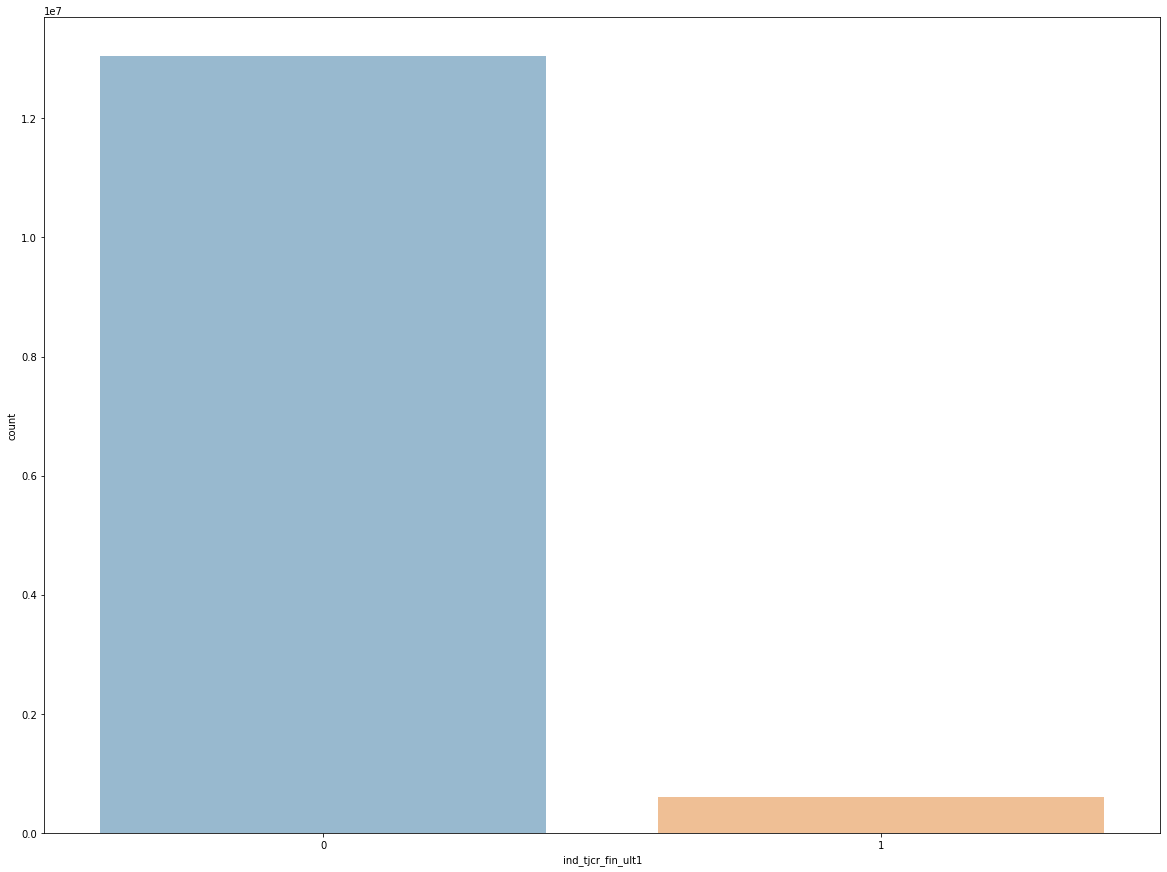

--------------------------------------------------
col :  ind_valo_fin_ult1


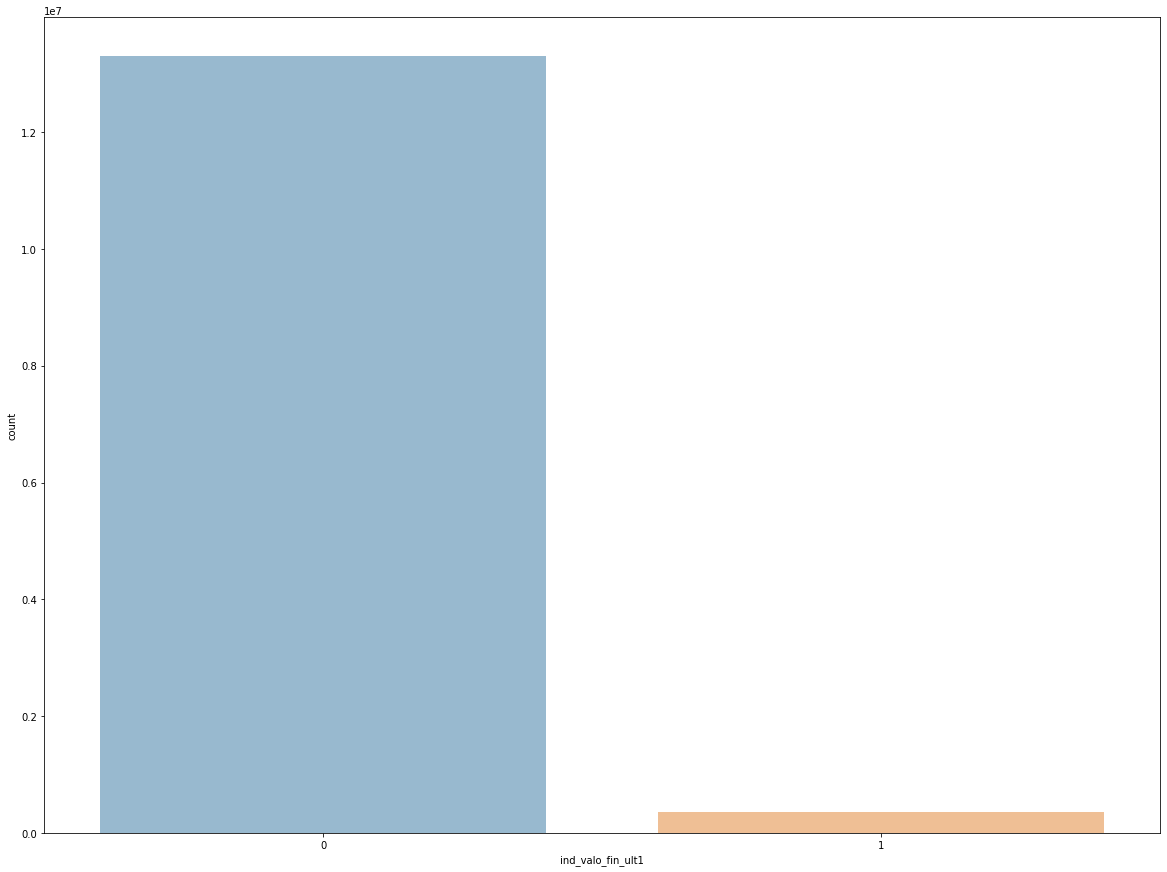

--------------------------------------------------
col :  ind_viv_fin_ult1


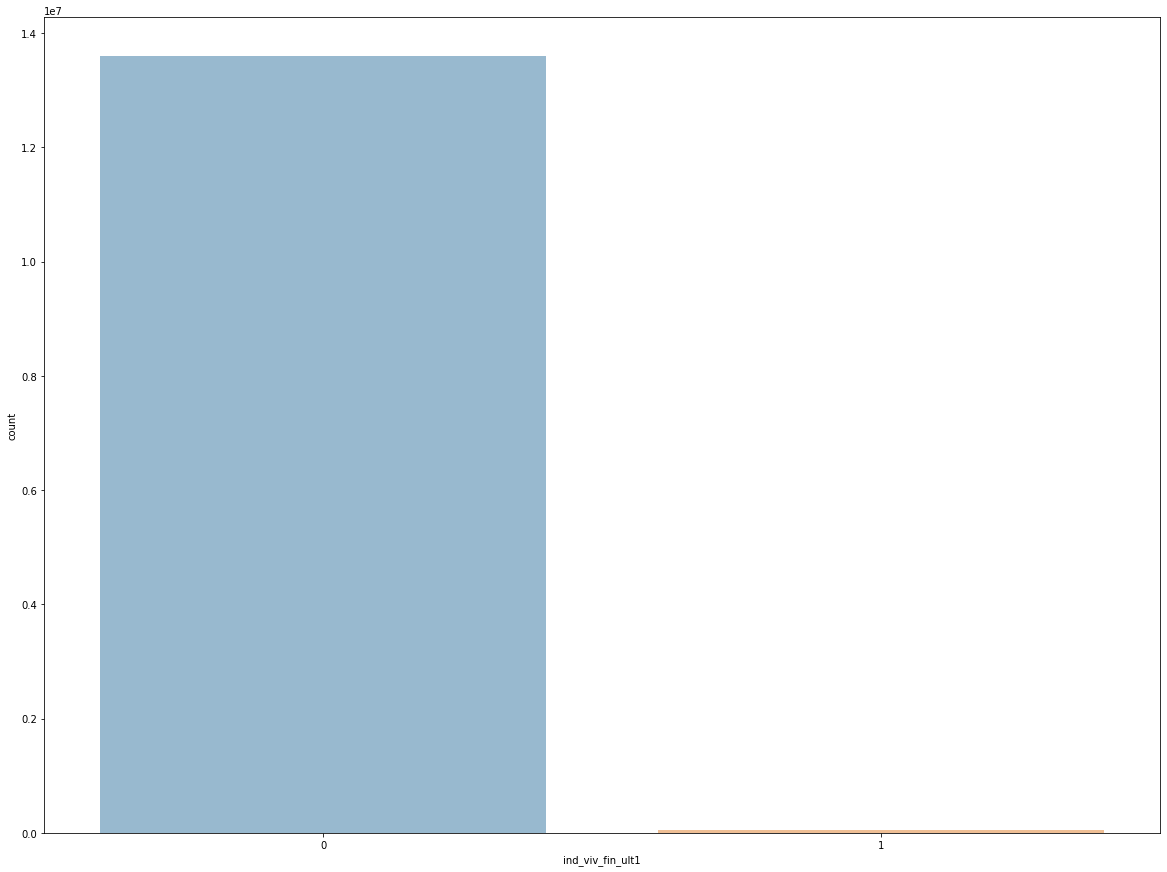

--------------------------------------------------
col :  ind_nomina_ult1


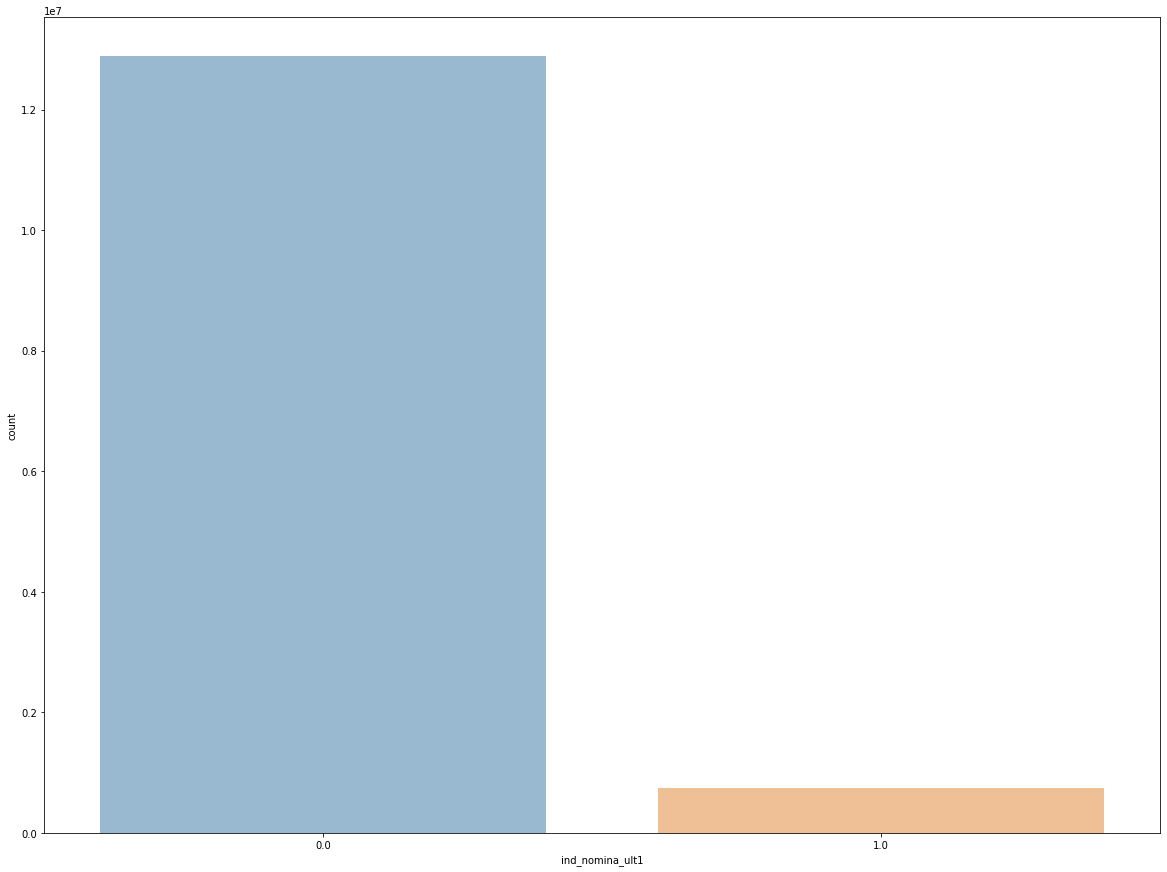

--------------------------------------------------
col :  ind_nom_pens_ult1


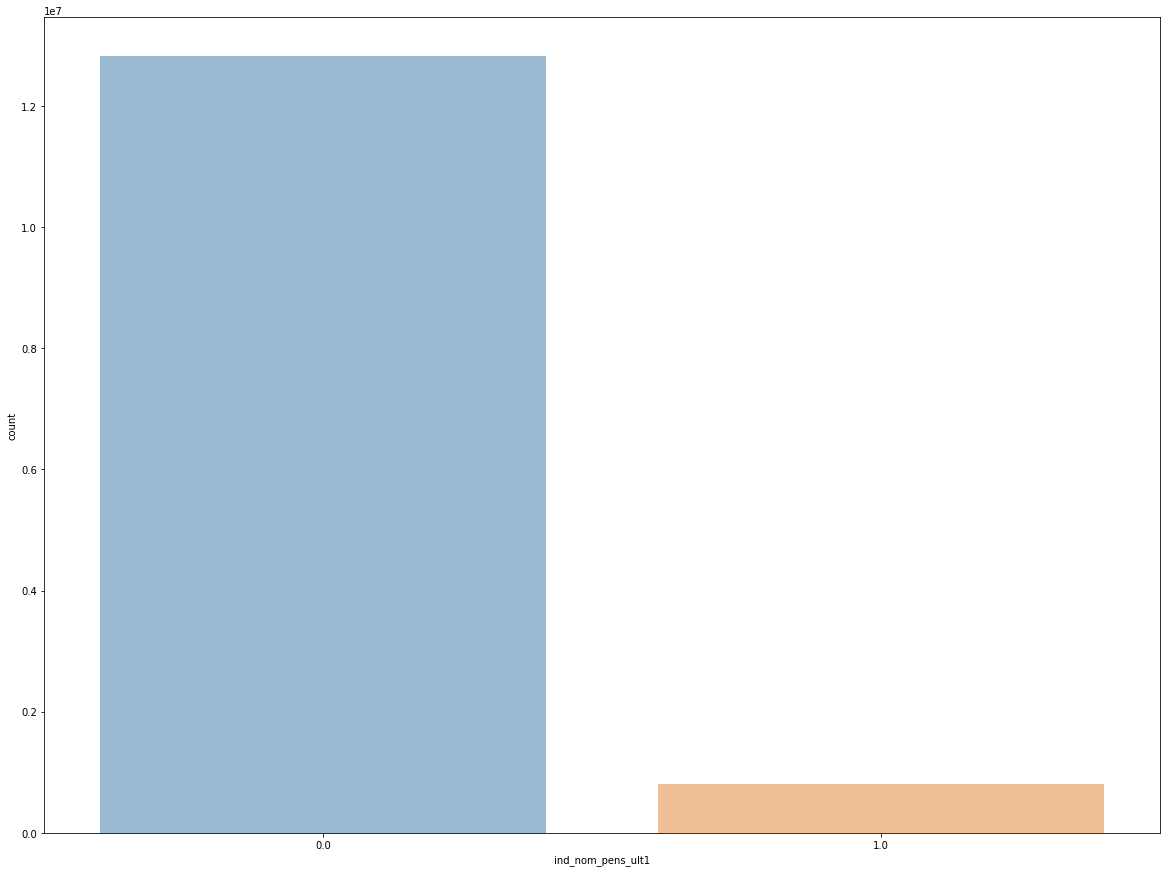

--------------------------------------------------
col :  ind_recibo_ult1


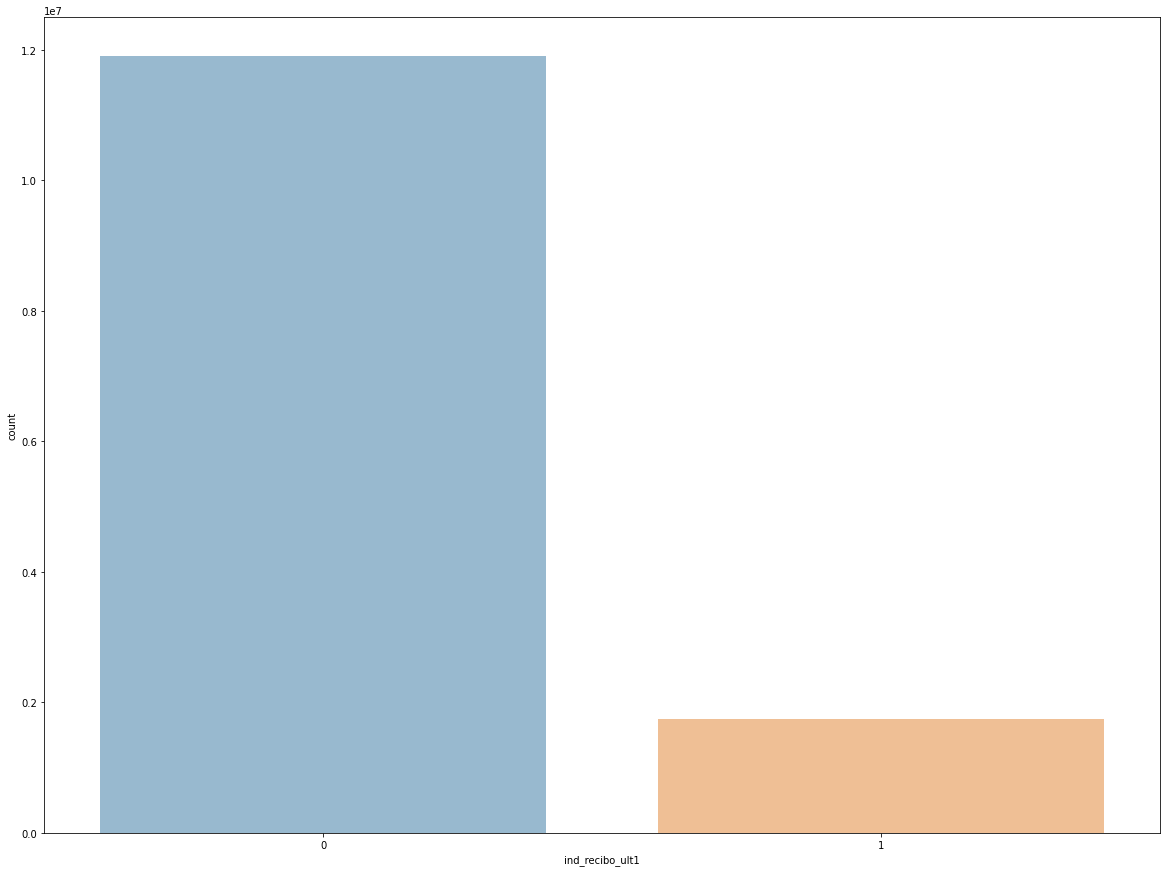

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

skip = ["ncodpers","renta"]
for col in data.columns:
  if col in skip: continue
  print('-'*50)
  print('col : ',col)
  f, ax = plt.subplots(figsize=(20,15))
  sns.countplot(x=col,data=data,alpha=0.5)
  plt.show()

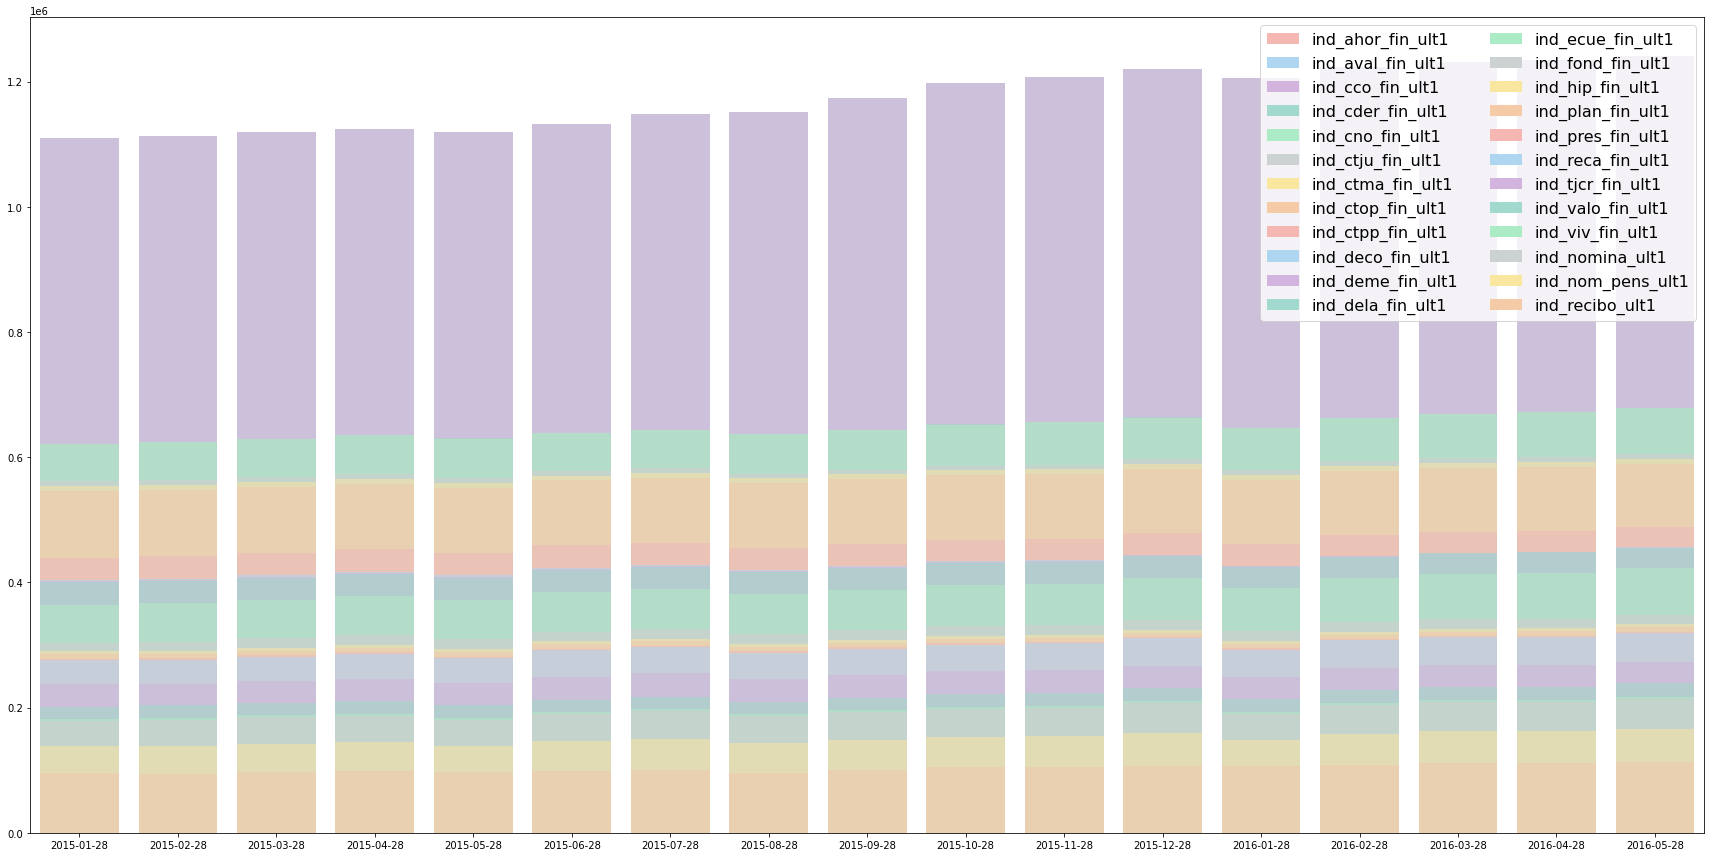

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

month = data['fecha_dato'].unique().tolist()
labels = data.columns[24:].tolist()

label_over_time = []
for i in range(len(labels)):
  label_sum = data.groupby(['fecha_dato'])[labels[i]].agg('sum')
  label_over_time.append(label_sum.tolist())
label_sum_over_time = []
for i in range(len(labels)):
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1','#AED6F1','#D2B4DE','#A2D9CE','#ABEBC6','#CCD1D1','#F9E79F','#F5CBA7']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(labels)):
  sns.barplot(x=month, y=label_sum_over_time[i],color=color_list[i%8],alpha=0.7)
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(labels))], labels, loc=1, ncol=2, prop={'size':16})

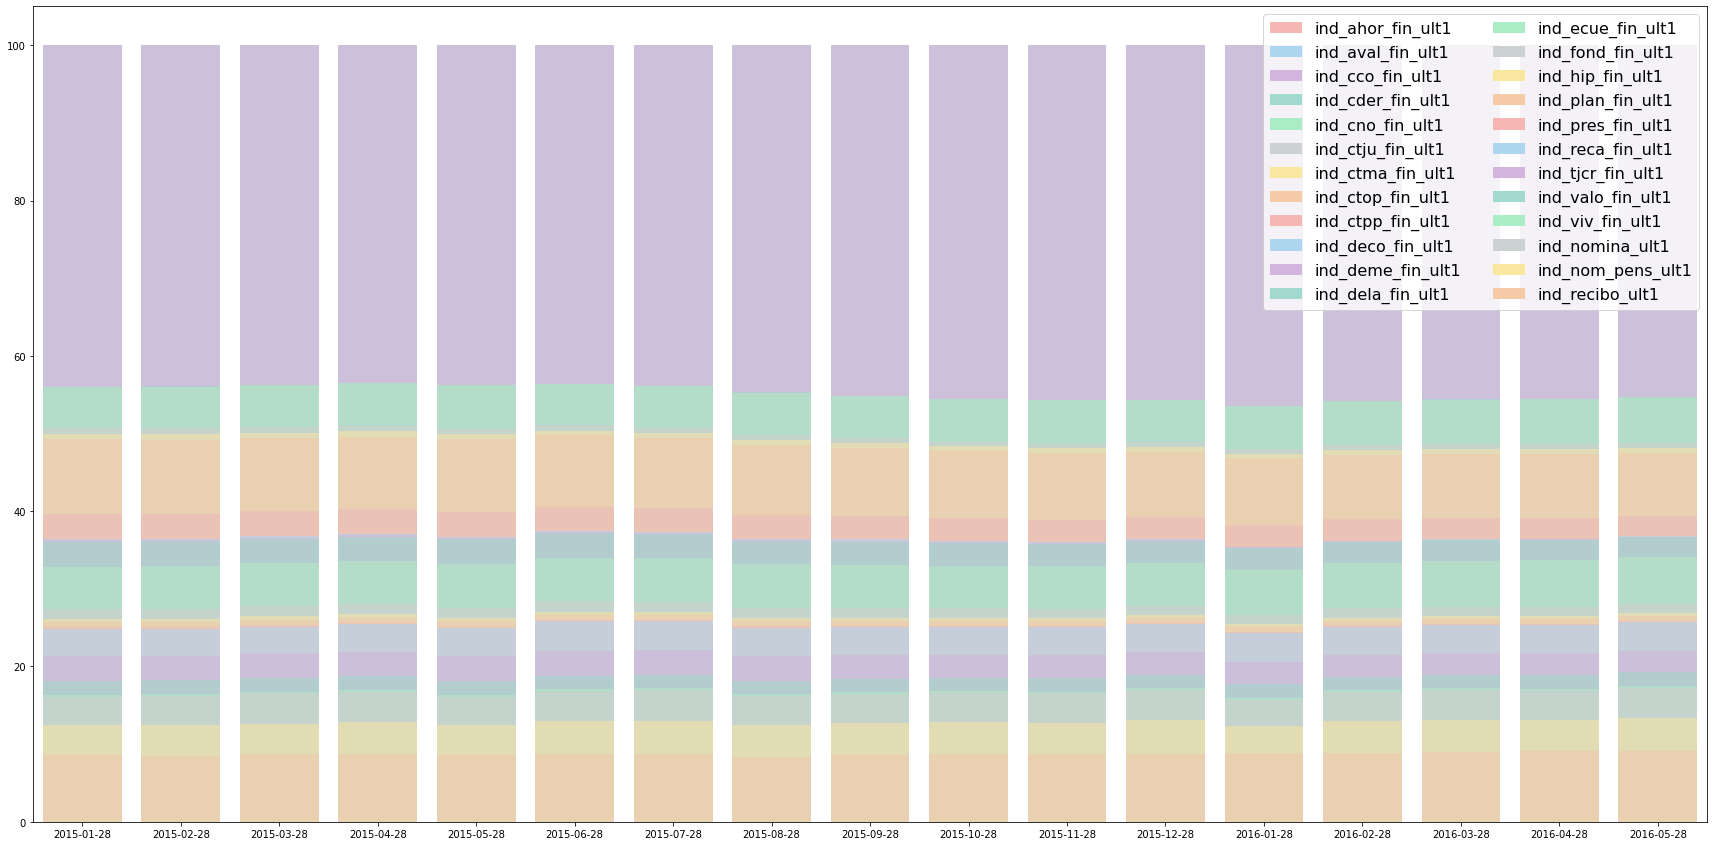

In [10]:
label_sum_percent = (label_sum_over_time/(1.*np.asarray(label_sum_over_time).max(axis=0)))*100

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(labels)):
 sns.barplot(x=month, y=label_sum_percent[i],color=color_list[i%8],alpha=0.7)
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(labels))], labels, loc=1, ncol=2, prop={'size':16})

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/캐글/santander/santander-product-recommendation/train_ver2.csv/train_ver2.csv")
labels = data.columns[24:].tolist()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
def date_to_int(str_data):
  Y, M, D = [int(a) for a in str_data.strip().split("-")]
  int_date = (int(Y)-2015)*12 + int(M)
  return int_date

data['int_date'] = data['fecha_dato'].map(lambda x: date_to_int(x)).astype(np.int8)
datas = data.copy()
print(datas['int_date'])
datas['int_date'] += 1
datas.colums = [col+"_prev" if col not in ["ncodpers","int_date"] else col for col in data.columns]

df_data = data.merge(datas, on=['ncodpers','int_date'],how='left')

del data, datas

for label in labels:
  prev = label + "_prev"
  df_data[prev].fillna(0,inplace=True)

for label in labels:
  padd = label + "_add"
  prev = label + "_prev"
  df_data[padd] = ((df_data[label]==1)&(df_data[prev]==0)).astype(np.int8)

add_cols = [label + "_add" for label in labels]
new_labels = df_data[add_cols].copy()
new_labels.columns = labels
new_labels.to_csv("/content/drive/MyDrive/캐글/santander/santander-product-recommendation/train_ver2.csv/labels.csv",index=False)


0            1
1            1
2            1
3            1
4            1
            ..
13647304    17
13647305    17
13647306    17
13647307    17
13647308    17
Name: int_date, Length: 13647309, dtype: int8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})